# The Pandemic Playoffs: The Effects of the COVID-19 Bubble on NBA Playoff Game Statistics

# Overview

By completing this project, we sought to explain how the COVID-19 Bubble affected the home team advantage and altered NBA Playoff game statistics. To answer our question, we compiled game statistics from the 2015-2019 Playoff seasons, comparing them to those generated during the 2020 Bubble. We performed several statistical analyses, determining which game statistics changed significantly. Our results reveal that the Bubble playoffs eliminated the home team advantage. For both home and away teams, although their overall defensive statistics remained the same, offensive statistics improved. They suggest that the superior performance by the away teams was the primary factor contributing to the reduced win rate of the home teams.

# Names

- Khiem Pham
- Charles Mastrangelo
- Joseph Perez
- Patrick Yeh
- Riki Osawa

<a id='research_question'></a>
# Research Question

How did the COVID-19 pandemic playoffs in the NBA, held in a single neutral stadium with no fans, affect the home team advantage? How did these changes affect NBA play tendencies (i.e. shot type efficiency, rebounds, assists, turnovers, steals, blocks, etc.)?

# Background & Prior Work

COVID-19 has affected the way sporting events are held. To adapt to the social and regulatory impositions of this pandemic, the world’s leading professional basketball league, the National Basketball Association (NBA), established an isolated venue from which games could be safely played. At this location, dubbed the “2020 NBA Bubble” (also known as the “Disney Bubble” or the “Orlando Bubble”), the NBA hosted its final games of the season, as well as its 2020 playoffs: the annual postseason games deciding the champion [3]. The neutrality of the 2020 NBA Bubble guaranteed that participating teams would lack the “home team advantage” - the factors benefitting teams on their home courts. In our project, we seek to quantify how the absence of a home team advantage impacts the outcome of games, as well as the tactics implemented by their players.

In his article for Slate, a daily web-based magazine, author Alex Kirshner aggregated research investigating the effects of COVID-19 on the home team advantage. Upon analyzing win percentages across multiple professional sporting leagues enforcing their own procedures, Kirshner concluded that as their policies increased neutrality, so too did their home team advantages diminish [1]. With respect to the NBA, data referenced in the Slate commentary comprised the win percentages of games played inside and outside the 2020 NBA Bubble [1]. Perhaps unsurprisingly, win percentages for designated “home” teams within the 2020 NBA Bubble ranged from 39-44% - a sharp decline from the approximately 65% chance of victory enjoyed by teams playing on home turf with fans present [1]. While he speculates that the comforts of home, the exuberance of the crowds, and the fatigue imposed by travel upon the visiting team are among the factors that explain the phenomenon of the home team advantage, Kirshner concedes that additional research into the matter is required [1]. Indeed, we aim to address just that; and by defining what constitutes the “home team advantage,” we will study how the effects of policies motivated by COVID-19 alters it.

In their case study, Michael Price and Jun Yan from the University of Connecticut further explored the implications of COVID-19 upon home team advantage in the NBA. By comparing data from the pre-pandemic 2017-2019 playoffs with those from the 2020 NBA Bubble, they discovered improved performances by the visiting, or “away” teams [2]. Mirroring Kirshner’s observations, Price and Yan argued that home team advantage primarily manifests through the factors negatively impacting away teams, including their need to travel, as well as to contend with unfamiliar venues and opposing fans [2]. Furthermore, these researchers examine changes in home team strategy intended to compensate for their loss of advantage [2]. Their findings contribute to our research by yielding insights into the nature of the home team advantage, and the specific ways in which its removal changes NBA play tendencies.

References:

1) https://slate.com/culture/2021/02/coronavirus-home-field-advantage-causes-bubbles-fans-refs.html

2) https://arxiv.org/pdf/2103.02832.pdf

3) https://en.wikipedia.org/wiki/2020_NBA_Bubble


# Hypothesis

Due to COVID-19, teams that would have had a home team advantage will win less often than they did during pre-COVID playoff games. We predict that the home team advantage will be eliminated because the Bubble is played in neutral settings. The loss of the home team advantage will diminish play tendencies. Specifically, home teams will be more passive and attempt fewer shots. As a result, away teams will play more offensively.

# Dataset

- Dataset Name: NBA
- Link to the dataset: https://www.nba.com/stats/teams/boxscores/
- Number of observations: 986

The number of observations is the number of teams for every game in the playoffs from 2015 to 2020. 162 games in 2015, 172 games in 2016, 158 games in 2017, 164 games in 2018, 164 games in 2019, 166 observations in 2020 = 986.

This dataset, containing a wide array of basketball game statistics, is found on the official website of the NBA.

# Setup

In [ ]:
# Import libraries

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import scipy.stats as stats

# Data Cleaning

We received our data directly from the NBA’s official website. The data was already clean, in the tidy format, and ready for us to work with. Many relevant game statistics already had their own columns. To get the data into a usable format, we transferred it from the website to Microsoft Excel, and saved them as CSV files. We then uploaded the data to GitHub for ease of access.

Being unfamiliar with NBA conventions, upon examining our data, we were left to interpret some information. Specifically, the “Match Up” column had two formats for games: “Team 1 @ Team 2,” and “Team 1 vs. Team 2.” We deduced that when there is the @ symbol, Team 1 is the away team; likewise, when there is a "vs" then Team 1 is the home team. Still, to make the identification of home and away teams more obvious, we added a new column, “Home/Away,” to contain this information. We have implemented a function to facilitate this process, and we have set "Home/Away" as the third column in our dataset. This allows us to group together the "Home” and “Away" games separately in order for us to conduct our analysis.

To answer our research question, we must compare pre-COVID NBA playoff games with Bubble games. Currently, we have one Bubble playoff season in its own CSV file, and five pre-COVID playoff seasons in five separate CSV files. We chose to have five pre-COVID playoff years to allow us a comfortable number of games to analyze, which also reflect recent trends in NBA play tendencies.

Glossary of column names:
 - **MIN** - Minutes Played
 - **PTS** - Points
 - **FGM** - Field Goals Made
 - **FGA** - Field Goals Attempted
 - **FG%** - Field Goal Percentage
 - **3PM** - 3 Point Field Goals Made
 - **3PA** - 3 Point Field Goals Attempted
 - **3P%** - 3 Point Field Goal Percentage
 - **FTM** - Free Throws Made
 - **FTA** - Free Throws Attempted
 - **FT%** - Free Throw Percentage
 - **OREB** - Offensive Rebounds
 - **DREB** - Defensive Rebounds
 - **REB** - Rebounds
 - **AST** - Assists
 - **STL** - Steals
 - **BLK** - Blocks
 - **TOV** - Turnovers
 - **PF** - Personal Fouls
 - **+/-** - (Team Points - Opponent Points)

---


In [ ]:
# Import csv files
df14_15 = pd.read_csv('https://raw.githubusercontent.com/kpham841/NBA-Playoffs-Data/main/NBA%20Playoffs%202014-15.csv')
df15_16 = pd.read_csv('https://raw.githubusercontent.com/kpham841/NBA-Playoffs-Data/main/NBA%20Playoffs%202015-16.csv')
df16_17 = pd.read_csv('https://raw.githubusercontent.com/kpham841/NBA-Playoffs-Data/main/NBA%20Playoffs%202016-17.csv')
df17_18 = pd.read_csv('https://raw.githubusercontent.com/kpham841/NBA-Playoffs-Data/main/NBA%20Playoffs%202017-18.csv')
df18_19 = pd.read_csv('https://raw.githubusercontent.com/kpham841/NBA-Playoffs-Data/main/NBA%20Playoffs%202018-19.csv')
df19_20 = pd.read_csv('https://raw.githubusercontent.com/kpham841/NBA-Playoffs-Data/main/NBA%20Playoffs%202019-20.csv')
df19_20.head()

,TEAM,MATCH UP,GAME DATE,Win/Loss,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,Plus/Minus
0,TOR,TOR vs. BKN,8/17/2020,W,240,134,40,85,47.1,22,44,50.0,32,33,97.0,9,38,47,26,4,6,12,22,24
1,BOS,BOS vs. PHI,8/17/2020,W,240,109,38,90,42.2,10,31,32.3,23,26,88.5,16,27,43,22,12,4,7,21,8
2,DAL,DAL @ LAC,8/17/2020,L,240,110,37,81,45.7,15,43,34.9,21,24,87.5,5,36,41,18,9,2,21,21,-8
3,DEN,DEN vs. UTA,8/17/2020,W,265,135,49,95,51.6,22,41,53.7,15,18,83.3,8,33,41,23,10,6,12,22,10
4,PHI,PHI @ BOS,8/17/2020,L,240,101,37,80,46.3,9,27,33.3,18,23,78.3,15,35,50,23,5,3,18,24,-8


In [ ]:
# Function that returns the data frame with a new column indicating if the team was the Home or Away team
def home_away(df):
  df_Home_Away = []
  for index, row in df.iterrows():
    if '@' in row['MATCH UP']:
      if row['MATCH UP'][-3:] == row['TEAM']:
        df_Home_Away.append('Home')
      else:
        df_Home_Away.append('Away')
    else:
      if row['MATCH UP'][0:3] == row['TEAM']:
        df_Home_Away.append('Home')
      else:
        df_Home_Away.append('Away')
  df['HOME/AWAY'] = df_Home_Away
  df = df[['TEAM', 'MATCH UP', 'HOME/AWAY', 'GAME DATE', 'Win/Loss', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'Plus/Minus']]
  return df

In [ ]:
# Create a new column that indicates if the team was the Home or Away team
df14_15 = home_away(df14_15)
df15_16 = home_away(df15_16)
df16_17 = home_away(df16_17)
df17_18 = home_away(df17_18)
df18_19 = home_away(df18_19)
df19_20 = home_away(df19_20)
df19_20.head()

,TEAM,MATCH UP,HOME/AWAY,GAME DATE,Win/Loss,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,Plus/Minus
0,TOR,TOR vs. BKN,Home,8/17/2020,W,240,134,40,85,47.1,22,44,50.0,32,33,97.0,9,38,47,26,4,6,12,22,24
1,BOS,BOS vs. PHI,Home,8/17/2020,W,240,109,38,90,42.2,10,31,32.3,23,26,88.5,16,27,43,22,12,4,7,21,8
2,DAL,DAL @ LAC,Away,8/17/2020,L,240,110,37,81,45.7,15,43,34.9,21,24,87.5,5,36,41,18,9,2,21,21,-8
3,DEN,DEN vs. UTA,Home,8/17/2020,W,265,135,49,95,51.6,22,41,53.7,15,18,83.3,8,33,41,23,10,6,12,22,10
4,PHI,PHI @ BOS,Away,8/17/2020,L,240,101,37,80,46.3,9,27,33.3,18,23,78.3,15,35,50,23,5,3,18,24,-8


In [ ]:
# Create a single dataframe for all games pre-Covid
df14_16 = df14_15.append(df15_16)
df14_17 = df14_16.append(df16_17)
df14_18 = df14_17.append(df17_18)
df14_19 = df14_18.append(df18_19)
print(df14_19.shape)
df14_19.head()

# Create a dataframe containing ALL games
df14_20 = df14_19.append(df19_20)
print(df14_20.shape)
df14_20.head()

(820, 25)
(986, 25)


,TEAM,MATCH UP,HOME/AWAY,GAME DATE,Win/Loss,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,Plus/Minus
0,DAL,DAL @ HOU,Away,4/18/2015,L,240,108,44,99,44.4,6,17,35.3,14,17,82.4,14,35,49,19,5,4,17,28,-10
1,NOP,NOP @ GSW,Away,4/18/2015,L,240,99,35,83,42.2,9,22,40.9,20,25,80.0,10,34,44,24,8,5,14,28,-7
2,TOR,TOR vs. WAS,Home,4/18/2015,L,265,86,35,92,38.0,6,29,20.7,10,14,71.4,10,38,48,21,5,4,12,21,-7
3,HOU,HOU vs. DAL,Home,4/18/2015,W,240,118,38,85,44.7,10,25,40.0,32,45,71.1,8,36,44,26,11,9,13,22,10
4,CHI,CHI vs. MIL,Home,4/18/2015,W,240,103,38,83,45.8,12,32,37.5,15,22,68.2,10,42,52,30,8,7,19,21,12


As we looked at the number of columns, to simplify our data, we wanted to figure out how to streamline certain stats. We recognized that we could represent the values in certain columns as percentages, as we did not require the raw values.

Instead of using OREB, DREB, and REB, we created the OREB% and DREB% columns, which we added to our dataset.

In [ ]:
#OREB% and DREB% columns
#Multiplying each result by 100 to report as an integer, maintaining consistency
#with percentages used elsewhere (e.g., FG%, 3P%, FT%).
df14_19["OREB%"] = (df14_19["OREB"] / df14_19["REB"]) * 100
df19_20["OREB%"] = (df19_20["OREB"] / df19_20["REB"]) * 100
df14_19["DREB%"] = (df14_19["DREB"] / df14_19["REB"]) * 100
df19_20["DREB%"] = (df19_20["DREB"] / df19_20["REB"]) * 100
df14_19.head()

,TEAM,MATCH UP,HOME/AWAY,GAME DATE,Win/Loss,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,Plus/Minus,OREB%,DREB%
0,DAL,DAL @ HOU,Away,4/18/2015,L,240,108,44,99,44.4,6,17,35.3,14,17,82.4,14,35,49,19,5,4,17,28,-10,28.571429,71.428571
1,NOP,NOP @ GSW,Away,4/18/2015,L,240,99,35,83,42.2,9,22,40.9,20,25,80.0,10,34,44,24,8,5,14,28,-7,22.727273,77.272727
2,TOR,TOR vs. WAS,Home,4/18/2015,L,265,86,35,92,38.0,6,29,20.7,10,14,71.4,10,38,48,21,5,4,12,21,-7,20.833333,79.166667
3,HOU,HOU vs. DAL,Home,4/18/2015,W,240,118,38,85,44.7,10,25,40.0,32,45,71.1,8,36,44,26,11,9,13,22,10,18.181818,81.818182
4,CHI,CHI vs. MIL,Home,4/18/2015,W,240,103,38,83,45.8,12,32,37.5,15,22,68.2,10,42,52,30,8,7,19,21,12,19.230769,80.769231


In [ ]:
# Check for any null values
print((df14_19.append(df19_20)).isnull().values.any())

False


# Data Analysis & Results (EDA)

To carry out our exploratory data analysis, we will examine pre-COVID and Bubble games to get a sense of the distribution of the data. We will also use the opportunity to check for any anomalous values.

In [ ]:
# Check pre-COVID distribution
df14_19[['PTS', 'FG%', '3P%', 'FT%', 'OREB%', 'DREB%', 'AST', 'STL', 'BLK', 'TOV']].describe()

,PTS,FG%,3P%,FT%,OREB%,DREB%,AST,STL,BLK,TOV
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,103.665854,44.756341,34.902683,76.148171,23.016537,76.983463,21.703659,7.374390,4.932927,13.325610
std,12.572158,5.524424,9.431810,10.570248,7.212925,7.212925,5.118974,2.852941,2.546110,3.811182
min,66.000000,28.600000,6.300000,41.200000,4.000000,55.102041,9.000000,1.000000,0.000000,3.000000
25%,95.000000,40.900000,28.600000,69.000000,17.948718,72.222222,18.000000,5.000000,3.000000,11.000000
50%,103.000000,44.650000,34.800000,76.500000,22.727273,77.272727,22.000000,7.000000,5.000000,13.000000
75%,113.000000,48.300000,41.400000,83.300000,27.777778,82.051282,25.000000,9.000000,6.000000,16.000000
max,145.000000,60.700000,72.700000,100.000000,44.897959,96.000000,39.000000,20.000000,15.000000,28.000000


In [ ]:
# Check Bubble distribution
df19_20[['PTS', 'FG%', '3P%', 'FT%', 'OREB%', 'DREB%', 'AST', 'STL', 'BLK', 'TOV']].describe()

,PTS,FG%,3P%,FT%,OREB%,DREB%,AST,STL,BLK,TOV
count,166.000000,166.00000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,109.560241,45.79759,35.965663,79.013253,20.315814,79.684186,22.867470,7.036145,4.259036,14.000000
std,12.472247,5.35554,7.689022,9.465315,7.311343,7.311343,4.628688,2.694307,1.972326,3.648163
min,78.000000,29.50000,15.200000,53.800000,3.846154,57.500000,11.000000,1.000000,0.000000,6.000000
25%,101.250000,42.20000,31.450000,73.025000,15.819378,75.138889,20.000000,5.000000,3.000000,11.000000
50%,110.000000,45.40000,35.650000,79.300000,19.512195,80.487805,23.000000,7.000000,4.000000,14.000000
75%,117.000000,49.22500,40.000000,86.175000,24.861111,84.180622,26.000000,9.000000,5.750000,16.000000
max,154.000000,63.10000,62.900000,100.000000,42.500000,96.153846,39.000000,14.000000,9.000000,24.000000


We see that there are no strange values. For instance, all the data are integers or floats, there are no percentages over 100%, and there are no negative numbers.

## Winning Percentages for Home Teams
We first want to analyze the winning percentages of home teams for each year to see the general trend. If the win rate of the home team is significantly greater than 50%, we will assume that the home team advantage exists. If it exists, we will see whether it continues for the Bubble games. Should we observe that the win percentages of home teams do not significantly change during the Bubble games, we will speculate that COVID-19 has not impacted the home team advantage.

In [ ]:
#Creating list of pre-covid home win rates
home_wr_14_15=df14_15[(df14_15["HOME/AWAY"]=="Home") & (df14_15["Win/Loss"]=="W")].shape[0]
total_14_15=df14_15.shape[0] / 2
wr_14_15=home_wr_14_15 / total_14_15
home_wr_15_16=df15_16[(df15_16["HOME/AWAY"]=="Home") & (df15_16["Win/Loss"]=="W")].shape[0]
total_15_16=df15_16.shape[0] / 2
wr_15_16=home_wr_15_16 / total_15_16
home_wr_16_17=df16_17[(df16_17["HOME/AWAY"]=="Home") & (df16_17["Win/Loss"]=="W")].shape[0]
total_16_17=df16_17.shape[0] / 2
wr_16_17=home_wr_16_17 / total_16_17
home_wr_17_18=df17_18[(df17_18["HOME/AWAY"]=="Home") & (df17_18["Win/Loss"]=="W")].shape[0]
total_17_18=df17_18.shape[0] / 2
wr_17_18=home_wr_17_18 / total_17_18
home_wr_18_19=df18_19[(df18_19["HOME/AWAY"]=="Home") & (df18_19["Win/Loss"]=="W")].shape[0]
total_18_19=df18_19.shape[0] / 2
wr_18_19=home_wr_18_19 / total_18_19
pre_covid_home_wrs=list([wr_14_15,wr_15_16,wr_16_17,wr_17_18,wr_18_19])

#Calculating bubble home win rates
home_wr_19_20=df19_20[(df19_20["HOME/AWAY"]=="Home") & (df19_20["Win/Loss"]=="W")].shape[0]
total_19_20=df19_20.shape[0] / 2
wr_19_20=home_wr_19_20 / total_19_20

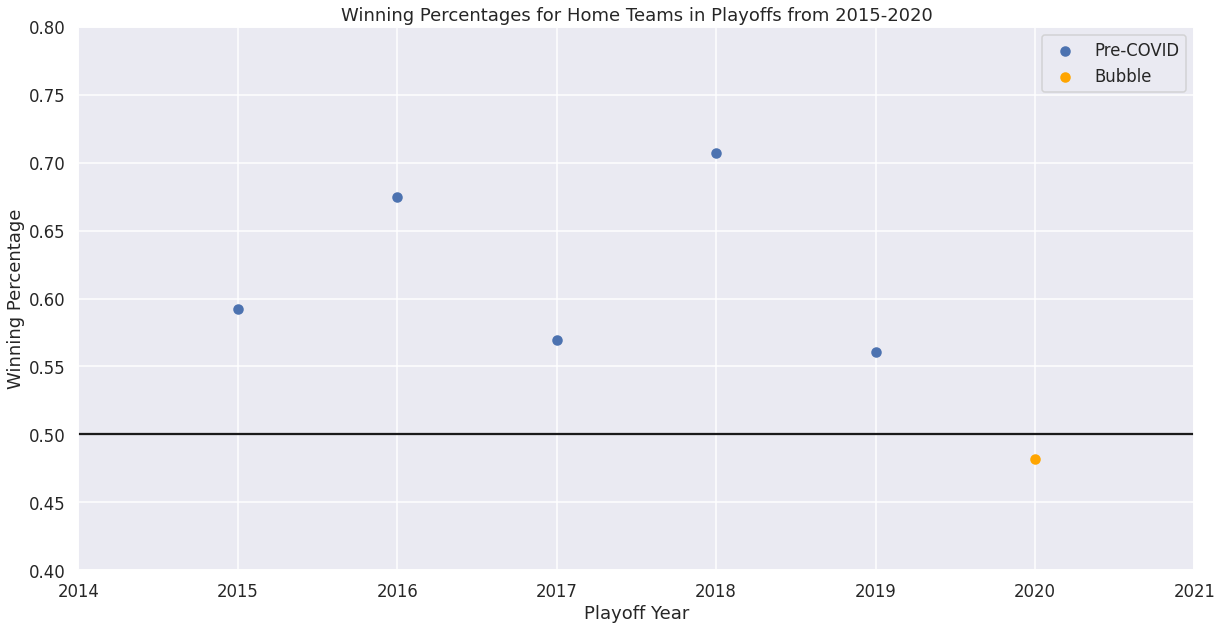

In [ ]:
#Home win rates from 2015-2020 playoffs
plt.figure(figsize=(20,10))
ax1 = plt.scatter(x=[2015,2016,2017,2018,2019],y=pre_covid_home_wrs)
ax2 = plt.scatter(x=[2020],y=wr_19_20,c='orange')

plt.xlabel('Playoff Year')
plt.axhline(y=0.5, color='k', linestyle='-')
plt.ylabel('Winning Percentage')
plt.title('Winning Percentages for Home Teams in Playoffs from 2015-2020')
plt.legend([ax1, ax2],['Pre-COVID','Bubble'])
plt.xlim([2014,2021])
plt.ylim([0.4,0.8])
plt.show()

The above plot shows the winning percentages for NBA home teams during the playoff games from 2015-2020. We can see that during the pre-COVID playoff seasons from 2015-2019, the home teams won over 50% of their games, suggesting they benefitted from home team advantage. In the Bubble playoffs of 2020, the designated home team won fewer than 50% of their games. It appears that the home team advantage was lost during the Bubble playoffs.

## Distribution of Statistics and their Relationship with the Home Win Rate

Due to the dramatic change in home team win rates during the Bubble games, we are now interested in examining all game statistics for both pre-COVID playoff seasons, as well as the Bubble games. Also, we will discover how all other game statistics relate to the home win rate.

In [ ]:
# Create a list for Home Win Rates to be used in Relationship Graphs
avg_pre_covid_home_wr = sum(pre_covid_home_wrs)/len(pre_covid_home_wrs)
home_wr = [avg_pre_covid_home_wr, wr_19_20]

### Distribution of Home Points and its Relationship to Home Win Rate

Pre-COVID
mean: 105.93 	min: 66 	max: 145 	std: 12.4

Bubble
mean: 110.06 	min: 80 	max: 154 	std: 13.08


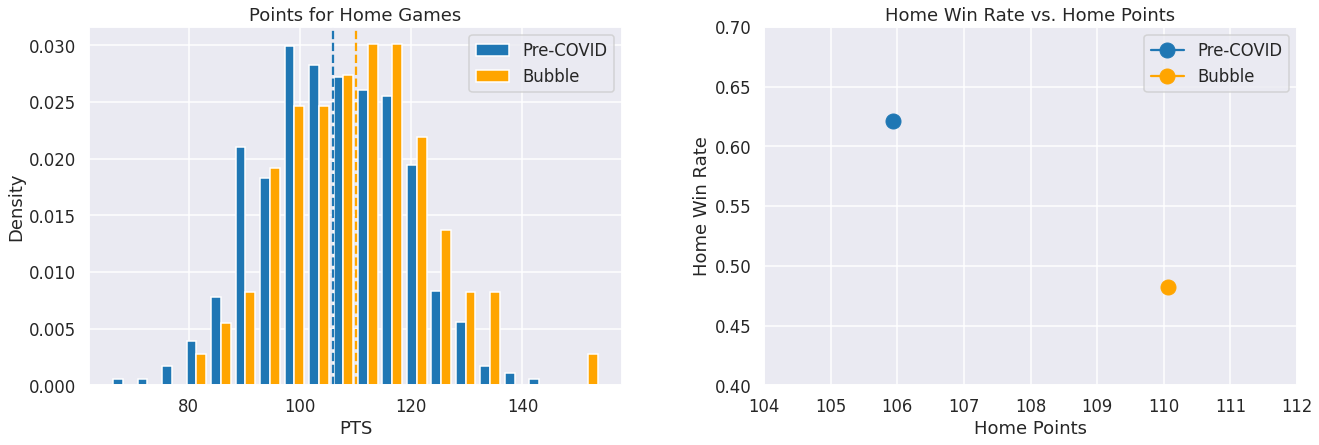

In [ ]:
# Graph Total Points for pre-covid games of home teams
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,8))
fig.tight_layout(pad=5.0)
ax1.title.set_text('Points for Home Games')
points_14_19_home= df14_19['PTS'].loc[df14_19['HOME/AWAY'] == 'Home']
points_19_20_home= df19_20['PTS'].loc[df19_20['HOME/AWAY'] == 'Home']
ax1.hist([points_14_19_home, points_19_20_home], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax1.axvline(points_14_19_home.mean(), color="#1f77b4",linestyle='--')
ax1.axvline(points_19_20_home.mean(), color="orange",linestyle='--')
ax1.legend(loc='upper right')
ax1.set_xlabel("PTS")
ax1.set_ylabel("Density")

home_points=[points_14_19_home.mean(),points_19_20_home.mean()]
ax2.title.set_text('Home Win Rate vs. Home Points')
ax2.plot(home_points[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax2.plot(home_points[1],home_wr[1],marker='o',color="orange", markersize=15)
ax2.legend(['Pre-COVID','Bubble'], loc='upper right')
ax2.set_xlabel("Home Points")
ax2.set_ylabel("Home Win Rate")
ax2.set_xlim([104, 112])
ax2.set_ylim([0.4,0.7])

print('Pre-COVID')
print('mean:', round(points_14_19_home.mean(),2), '\tmin:', points_14_19_home.min(), '\tmax:', points_14_19_home.max(), '\tstd:', round(points_14_19_home.std(),2))
print('\nBubble')
print('mean:', round(points_19_20_home.mean(),2), '\tmin:', points_19_20_home.min(), '\tmax:', points_19_20_home.max(), '\tstd:', round(points_19_20_home.std(),2))

plt.show()

For both the pre-COVID and Bubble games, the shape of the distributions are normal and unimodal.

The location for pre-COVID games is centered at 106 points ranging from 66 to 145 points as opposed to that of the Bubble games centered at 110 points and ranging from 80 to 154 points.

The spread for pre-COVID games is measured by a standard deviation of 12.4 points while the standard deviation for Bubble games is 13.1 points.

There are no significant outliers in either distribution. At first glance, it appears that the far-right Bubble value is an outlier. However, we believe that it fits within the typical "bell curve" shape, characteristic of a normal distribution such as what we see here.

There is a negative correlation between win rate and the number of points that home teams make.

**When the home-team advantage is eliminated, the average scoring total for home teams increases.**

### Distribution of Away Points and its Relationship to Home Win Rate

Pre-COVID
mean: 101.4 	min: 68 	max: 137 	std: 12.35

Bubble
mean: 109.06 	min: 78 	max: 150 	std: 11.9


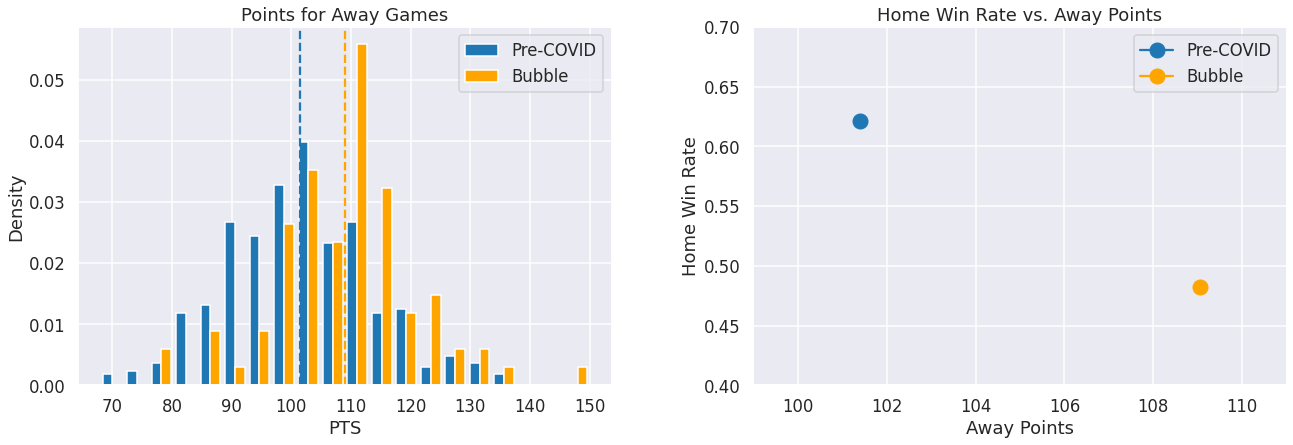

In [ ]:
# Graph Total Points for pre-covid games of away teams
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,8))
fig.tight_layout(pad=5.0)
ax1.title.set_text('Points for Away Games')
points_14_19_away= df14_19['PTS'].loc[df14_19['HOME/AWAY'] == 'Away']
points_19_20_away= df19_20['PTS'].loc[df19_20['HOME/AWAY'] == 'Away']
ax1.hist([points_14_19_away, points_19_20_away], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax1.axvline(points_14_19_away.mean(), color="#1f77b4",linestyle='--')
ax1.axvline(points_19_20_away.mean(), color="orange",linestyle='--')
ax1.legend(loc='upper right')
ax1.set_xlabel("PTS")
ax1.set_ylabel("Density")

away_points=[points_14_19_away.mean(),points_19_20_away.mean()]
ax2.title.set_text('Home Win Rate vs. Away Points')
ax2.plot(away_points[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax2.plot(away_points[1],home_wr[1],marker='o',color="orange", markersize=15)
ax2.legend(['Pre-COVID','Bubble'], loc='upper right')
ax2.set_xlabel("Away Points")
ax2.set_ylabel("Home Win Rate")
ax2.set_xlim([99, 111])
ax2.set_ylim([0.4,0.7])

print('Pre-COVID')
print('mean:', round(points_14_19_away.mean(),2), '\tmin:', points_14_19_away.min(), '\tmax:', points_14_19_away.max(), '\tstd:', round(points_14_19_away.std(),2))
print('\nBubble')
print('mean:', round(points_19_20_away.mean(),2), '\tmin:', points_19_20_away.min(), '\tmax:', points_19_20_away.max(), '\tstd:', round(points_19_20_away.std(),2))

plt.show()

For both the pre-COVID and Bubble games, the shape of the distributions are normal and unimodal.

The location for pre-COVID games is centered at 101 points ranging from 68 to 137 points as opposed to that of the Bubble games centered at 109 points and ranging from 78 to 150 points.

The spread for pre-COVID games is measured by a standard deviation of 12.4 points while the standard deviation for Bubble games is 11.9 points.

There are no significant outliers in either distribution. Similar to the previous graphs, at first it appears that the far-right Bubble value is an outlier. However, examining the distance between the mean and the max and the mean and the min is, we see that they are approximately the same.

There is a negative correlation between win rate and the number of points that away teams make.

**When the home-team advantage is eliminated, the average scoring total for away teams increases.**

### Distribution of Shooting Percentages for Home Games

FG%
Pre-COVID
mean: 45.54 	min: 28.6 	max: 60.7 	std: 5.64
Bubble
mean: 45.63 	min: 29.5 	max: 63.1 	std: 5.86

3P%
Pre-COVID
mean: 35.12 	min: 6.7 	max: 64.3 	std: 9.64
Bubble
mean: 36.4 	min: 15.6 	max: 62.9 	std: 8.17

FT%
Pre-COVID
mean: 76.25 	min: 42.9 	max: 100.0 	std: 10.34
Bubble
mean: 79.72 	min: 53.8 	max: 100.0 	std: 9.44


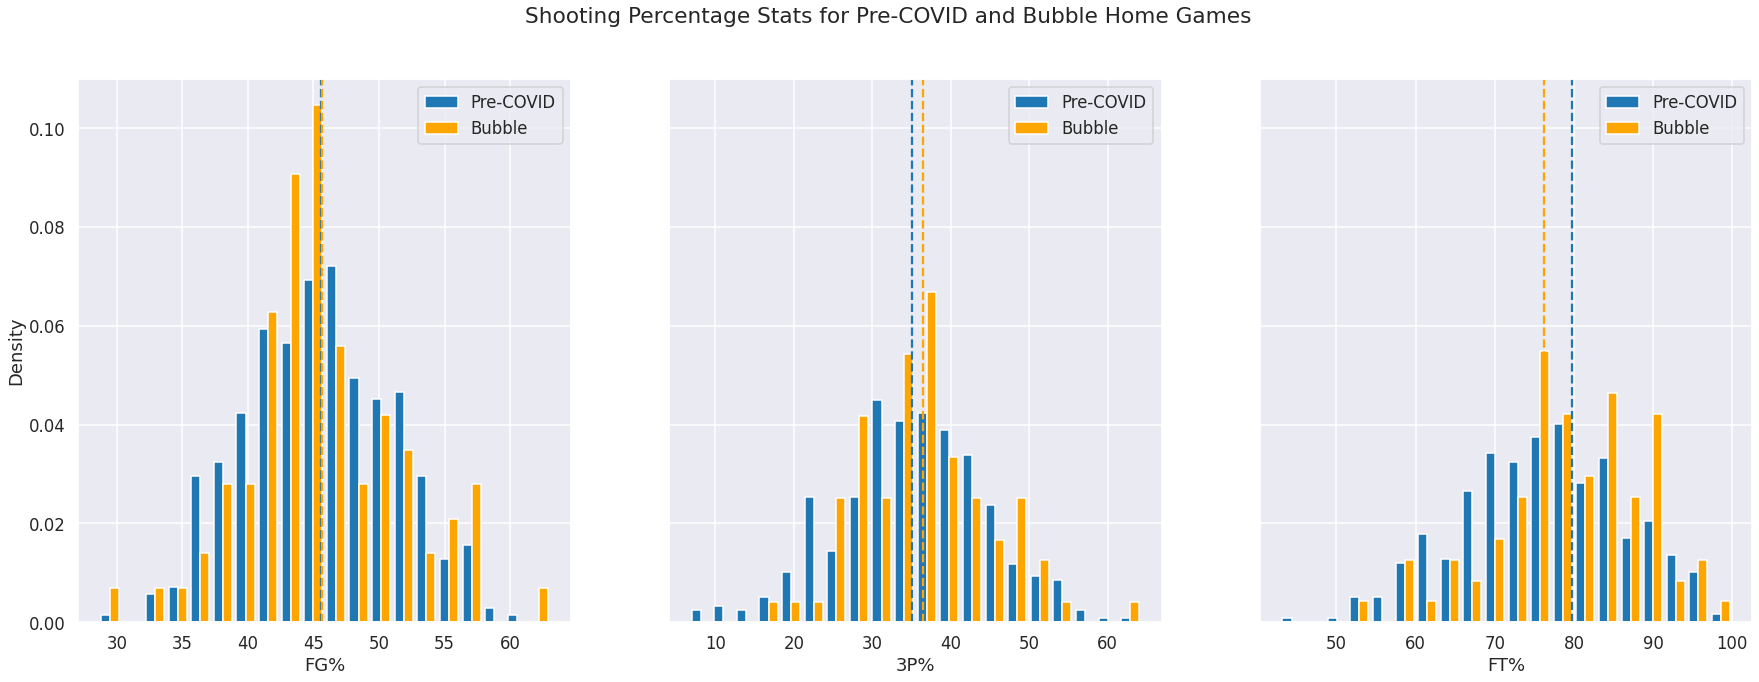

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, sharey=True, figsize=(30,10))

fig.suptitle('Shooting Percentage Stats for Pre-COVID and Bubble Home Games')

fgperc_14_19_home= df14_19['FG%'].loc[df14_19['HOME/AWAY'] == 'Home']
fgperc_19_20_home= df19_20['FG%'].loc[df19_20['HOME/AWAY'] == 'Home']

threeperc_14_19_home= df14_19['3P%'].loc[df14_19['HOME/AWAY'] == 'Home']
threeperc_19_20_home= df19_20['3P%'].loc[df19_20['HOME/AWAY'] == 'Home']

ftperc_14_19_home= df14_19['FT%'].loc[df14_19['HOME/AWAY'] == 'Home']
ftperc_19_20_home= df19_20['FT%'].loc[df19_20['HOME/AWAY'] == 'Home']
# Graph FG% for pre-covid and bubble games of home teams
ax1.hist([fgperc_14_19_home, fgperc_19_20_home], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax1.axvline(fgperc_14_19_home.mean(), color="#1f77b4",linestyle='--')
ax1.axvline(fgperc_19_20_home.mean(), color="orange",linestyle='--')
ax1.legend(loc='upper right')
ax1.set_xlabel("FG%")
ax1.set_ylabel("Density")
# Graph 3P% for pre-covid and bubble games of home teams
ax2.hist([threeperc_14_19_home, threeperc_19_20_home], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax2.axvline(threeperc_14_19_home.mean(), color="#1f77b4",linestyle='--')
ax2.axvline(threeperc_19_20_home.mean(), color="orange",linestyle='--')
ax2.legend(loc='upper right')
ax2.set_xlabel("3P%")
# Graph FT% for pre-covid and bubble games of home teams
ax3.hist([ftperc_14_19_home, ftperc_19_20_home], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax3.axvline(ftperc_19_20_home.mean(), color="#1f77b4",linestyle='--')
ax3.axvline(ftperc_14_19_home.mean(), color="orange",linestyle='--')
ax3.legend(loc='upper right')
ax3.set_xlabel("FT%")

print('FG%')
print('Pre-COVID')
print('mean:', round(fgperc_14_19_home.mean(),2), '\tmin:', fgperc_14_19_home.min(), '\tmax:', fgperc_14_19_home.max(), '\tstd:', round(fgperc_14_19_home.std(),2))
print('Bubble')
print('mean:', round(fgperc_19_20_home.mean(),2), '\tmin:', fgperc_19_20_home.min(), '\tmax:', fgperc_19_20_home.max(), '\tstd:', round(fgperc_19_20_home.std(),2))

print('\n3P%')
print('Pre-COVID')
print('mean:', round(threeperc_14_19_home.mean(),2), '\tmin:', threeperc_14_19_home.min(), '\tmax:', threeperc_14_19_home.max(), '\tstd:', round(threeperc_14_19_home.std(),2))
print('Bubble')
print('mean:', round(threeperc_19_20_home.mean(),2), '\tmin:', threeperc_19_20_home.min(), '\tmax:', threeperc_19_20_home.max(), '\tstd:', round(threeperc_19_20_home.std(),2))

print('\nFT%')
print('Pre-COVID')
print('mean:', round(ftperc_14_19_home.mean(),2), '\tmin:', ftperc_14_19_home.min(), '\tmax:', ftperc_14_19_home.max(), '\tstd:', round(ftperc_14_19_home.std(),2))
print('Bubble')
print('mean:', round(ftperc_19_20_home.mean(),2), '\tmin:', ftperc_19_20_home.min(), '\tmax:', ftperc_19_20_home.max(), '\tstd:', round(ftperc_19_20_home.std(),2))

plt.show()

**Field Goal Percentage**

For both the pre-COVID and Bubble games, the shape of the distributions are normal and unimodal.

The location for pre-COVID games is centered at 45.5 percent ranging from 28.6 to 60.7 percent as opposed to that of the Bubble games centered at 45.6 percent and ranging from 29.5 to 63.1 percent.

The spread for pre-COVID games is measured by a standard deviation of 5.6 percent while the standard deviation for Bubble games is 5.9 percent.

There are no significant outliers in either distribution.

**Three Point Percentage**

For both the pre-COVID and Bubble games, the shape of the distributions are normal and unimodal.

The location for pre-COVID games is centered at 35.1 percent ranging from 6.7 to 64.3 percent as opposed to that of the Bubble games centered at 36.4 percent and ranging from 8.2 to 62.9 percent.

The spread for pre-COVID games is measured by a standard deviation of 9.6 percent while the standard deviation for Bubble games is 8.2 percent.

There are no significant outliers in either distribution.

**Free Throw Percentage**

For pre-COVID games, the shape of the distribution is negatively skewed and unimodal.
For Bubble games, the distribution is normal and unimodal.

The location for pre-COVID games is centered at 76.3 percent ranging from 42.9 to 100 percent as opposed to that of the Bubble games centered at 79.7 percent and ranging from 53.8 to 100 percent.

The spread for pre-COVID games is measured by a standard deviation of 10.3 percent while the standard deviation for Bubble games is 9.4 percent.

There is one outlier of 42.9% within the pre-COVID games.

### Relationship Between Home Win Rates and Shooting Percentages of Home Games


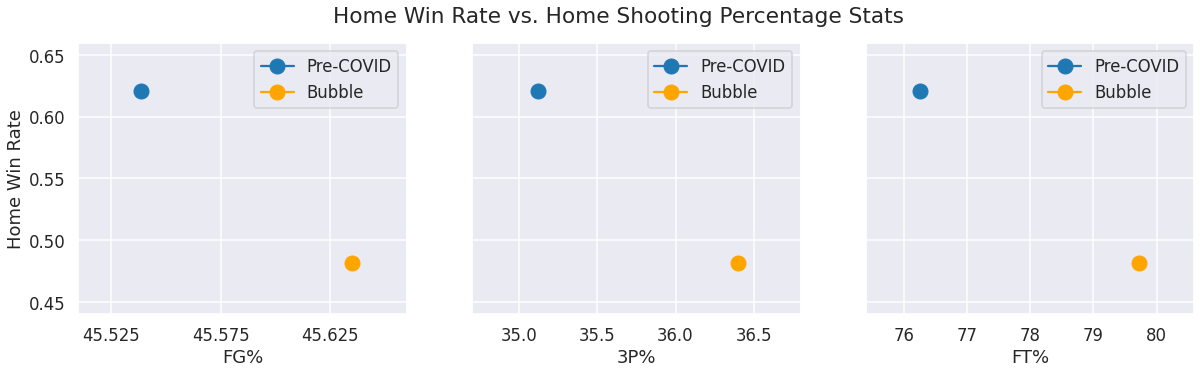

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, sharey=True, figsize=(20,5))
fig.suptitle("Home Win Rate vs. Home Shooting Percentage Stats")
home_fg=[fgperc_14_19_home.mean(),fgperc_19_20_home.mean()]
home_three=[threeperc_14_19_home.mean(),threeperc_19_20_home.mean()]
home_ft=[ftperc_14_19_home.mean(),ftperc_19_20_home.mean()]
ax1.set_ylabel("Home Win Rate")
plt.ylim([0.44,0.66])

# Home Field Goal
ax1.plot(home_fg[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax1.plot(home_fg[1],home_wr[1],marker='o',color="orange", markersize=15)
ax1.legend(['Pre-COVID','Bubble'], loc='upper right')
ax1.set_xlabel("FG%")
ax1.set_xlim([45.51,45.66])
ax1.set_xticks([45.525,45.575,45.625])

# Home 3 Pointers
ax2.plot(home_three[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax2.plot(home_three[1],home_wr[1],marker='o',color="orange", markersize=15)
ax2.legend(['Pre-COVID','Bubble'], loc='upper right')
ax2.set_xlabel("3P%")
ax2.set_xlim([34.7,36.8])

# Home Free Throws
ax3.plot(home_ft[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax3.plot(home_ft[1],home_wr[1],marker='o',color="orange", markersize=15)
ax3.legend(['Pre-COVID','Bubble'], loc='upper right')
ax3.set_xlabel("FT%")
ax3.set_xlim([75.4,80.6])

plt.show()

**Field Goal Percentage**

There is a negative relationship between home win rate and the percentage of field goals made by home teams in a game.
**When the home-team advantage is eliminated, the percentage of field goals made by home teams increases.**

**Three Point Percentage**

There is a negative relationship between home win rate and the percentage of three pointers made by home teams in a game.
**When the home-team advantage is eliminated, the percentage of three pointers made by home teams increases.**

**Free Throw Percentage**

There is a negative relationship between home win rate and the percentage of free throws made by home teams in a game.
**When the home-team advantage is eliminated, the percentage of free throws made by home teams increases.**

### Distribution of Shooting Percentages for Away Games

FG%
Pre-COVID
mean: 43.97 	min: 29.8 	max: 59.7 	std: 5.3
Bubble
mean: 45.96 	min: 31.5 	max: 56.3 	std: 4.83

3P%
Pre-COVID
mean: 34.69 	min: 6.3 	max: 72.7 	std: 9.22
Bubble
mean: 35.53 	min: 15.2 	max: 51.4 	std: 7.2

FT%
Pre-COVID
mean: 76.04 	min: 41.2 	max: 100.0 	std: 10.81
Bubble
mean: 78.3 	min: 56.3 	max: 95.5 	std: 9.49


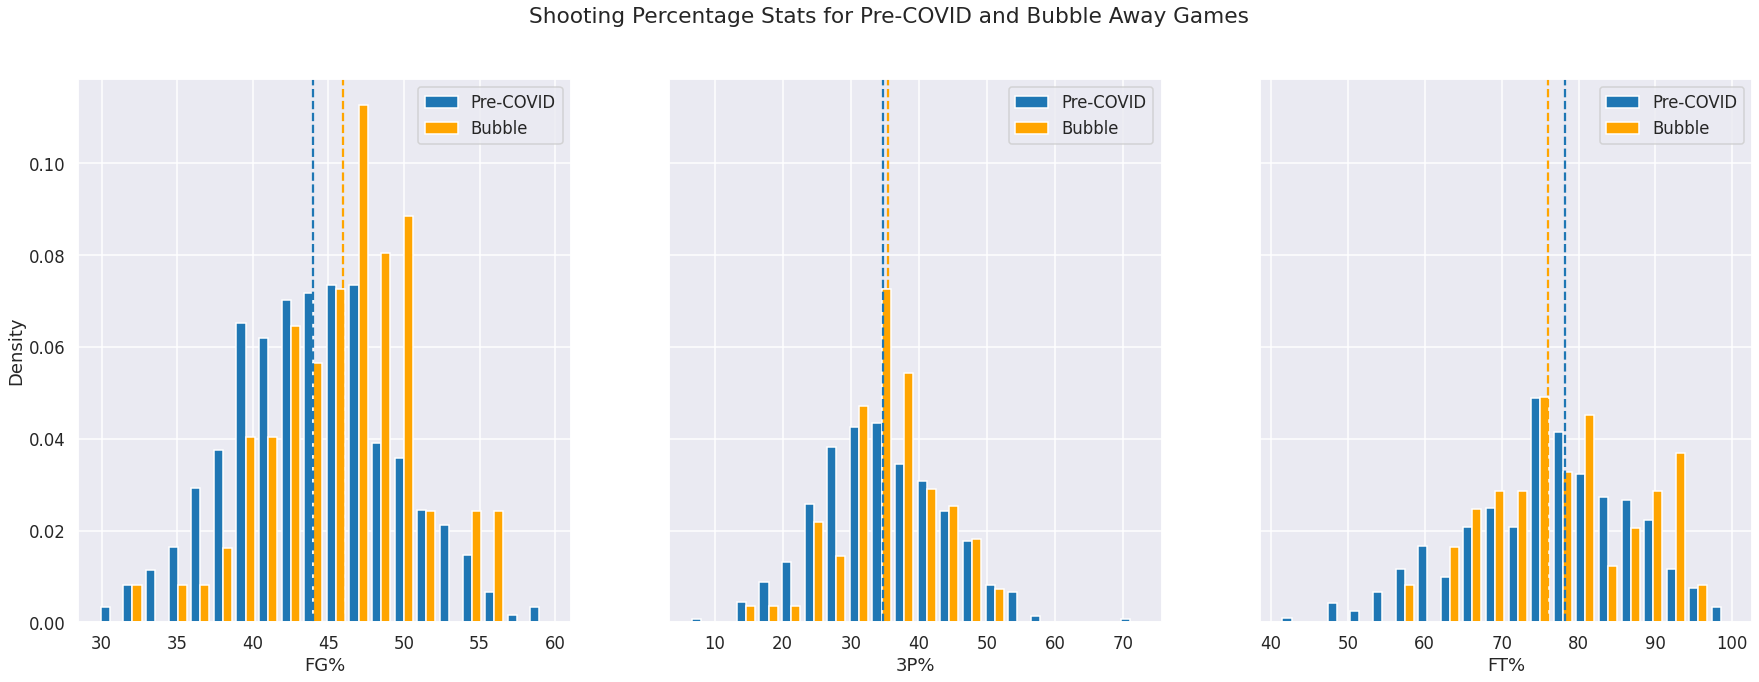

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, sharey=True, figsize=(30,10))

fig.suptitle('Shooting Percentage Stats for Pre-COVID and Bubble Away Games')

fgperc_14_19_away= df14_19['FG%'].loc[df14_19['HOME/AWAY'] == 'Away']
fgperc_19_20_away= df19_20['FG%'].loc[df19_20['HOME/AWAY'] == 'Away']

threeperc_14_19_away= df14_19['3P%'].loc[df14_19['HOME/AWAY'] == 'Away']
threeperc_19_20_away= df19_20['3P%'].loc[df19_20['HOME/AWAY'] == 'Away']

ftperc_14_19_away= df14_19['FT%'].loc[df14_19['HOME/AWAY'] == 'Away']
ftperc_19_20_away= df19_20['FT%'].loc[df19_20['HOME/AWAY'] == 'Away']
# Graph FG% for pre-covid and bubble games of away teams
ax1.hist([fgperc_14_19_away, fgperc_19_20_away], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax1.axvline(fgperc_14_19_away.mean(), color="#1f77b4",linestyle='--')
ax1.axvline(fgperc_19_20_away.mean(), color="orange",linestyle='--')
ax1.legend(loc='upper right')
ax1.set_xlabel("FG%")
ax1.set_ylabel("Density")
# Graph 3P% for pre-covid and bubble games of away teams
ax2.hist([threeperc_14_19_away, threeperc_19_20_away], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax2.axvline(threeperc_14_19_away.mean(), color="#1f77b4",linestyle='--')
ax2.axvline(threeperc_19_20_away.mean(), color="orange",linestyle='--')
ax2.legend(loc='upper right')
ax2.set_xlabel("3P%")
# Graph FT% for pre-covid and bubble games of away teams
ax3.hist([ftperc_14_19_away, ftperc_19_20_away], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax3.axvline(ftperc_19_20_away.mean(), color="#1f77b4",linestyle='--')
ax3.axvline(ftperc_14_19_away.mean(), color="orange",linestyle='--')
ax3.legend(loc='upper right')
ax3.set_xlabel("FT%")

print('FG%')
print('Pre-COVID')
print('mean:', round(fgperc_14_19_away.mean(),2), '\tmin:', fgperc_14_19_away.min(), '\tmax:', fgperc_14_19_away.max(), '\tstd:', round(fgperc_14_19_away.std(),2))
print('Bubble')
print('mean:', round(fgperc_19_20_away.mean(),2), '\tmin:', fgperc_19_20_away.min(), '\tmax:', fgperc_19_20_away.max(), '\tstd:', round(fgperc_19_20_away.std(),2))

print('\n3P%')
print('Pre-COVID')
print('mean:', round(threeperc_14_19_away.mean(),2), '\tmin:', threeperc_14_19_away.min(), '\tmax:', threeperc_14_19_away.max(), '\tstd:', round(threeperc_14_19_away.std(),2))
print('Bubble')
print('mean:', round(threeperc_19_20_away.mean(),2), '\tmin:', threeperc_19_20_away.min(), '\tmax:', threeperc_19_20_away.max(), '\tstd:', round(threeperc_19_20_away.std(),2))

print('\nFT%')
print('Pre-COVID')
print('mean:', round(ftperc_14_19_away.mean(),2), '\tmin:', ftperc_14_19_away.min(), '\tmax:', ftperc_14_19_away.max(), '\tstd:', round(ftperc_14_19_away.std(),2))
print('Bubble')
print('mean:', round(ftperc_19_20_away.mean(),2), '\tmin:', ftperc_19_20_away.min(), '\tmax:', ftperc_19_20_away.max(), '\tstd:', round(ftperc_19_20_away.std(),2))

plt.show()

**Field Goal Percentage**

For both the pre-COVID and Bubble games, the shape of the distributions are normal and unimodal.

The location for pre-COVID games is centered at 44.0 percent ranging from 29.8 to 59.7 percent as opposed to that of the Bubble games centered at 46.0 percent and ranging from 31.5 to 56.3 percent.

The spread for pre-COVID games is measured by a standard deviation of 5.3 percent while the standard deviation for Bubble games is 4.8 percent.

There are no significant outliers in either distribution.

**Three Point Percentage**

For both the pre-COVID and Bubble games, the shape of the distributions are normal and unimodal.

The location for pre-COVID games is centered at 34.7 percent ranging from 6.3 to 72.7 percent as opposed to that of the Bubble games centered at 35.5 percent and ranging from 15.2 to 51.4 percent.

The spread for pre-COVID games is measured by a standard deviation of 9.2 percent while the standard deviation for Bubble games is 7.2 percent.

There is one outlier of 72.7% within the pre-COVID games.

**Free Throw Percentage**

For pre-COVID games, the shape of the distribution is negatively skewed and unimodal.
For Bubble games, the distribution is bimodal.

The location for pre-COVID games is centered at 76.0 percent ranging from 41.2 to 100 percent as opposed to that of the Bubble games centered at 78.3 percent and ranging from 56.3 to 95.5 percent.

The spread for pre-COVID games is measured by a standard deviation of 10.8 percent while the standard deviation for Bubble games is 9.5 percent.

There is one outlier of 41.2% within the pre-COVID games.

### Relationship Between Home Win Rates and Shooting Percentages of Away Games

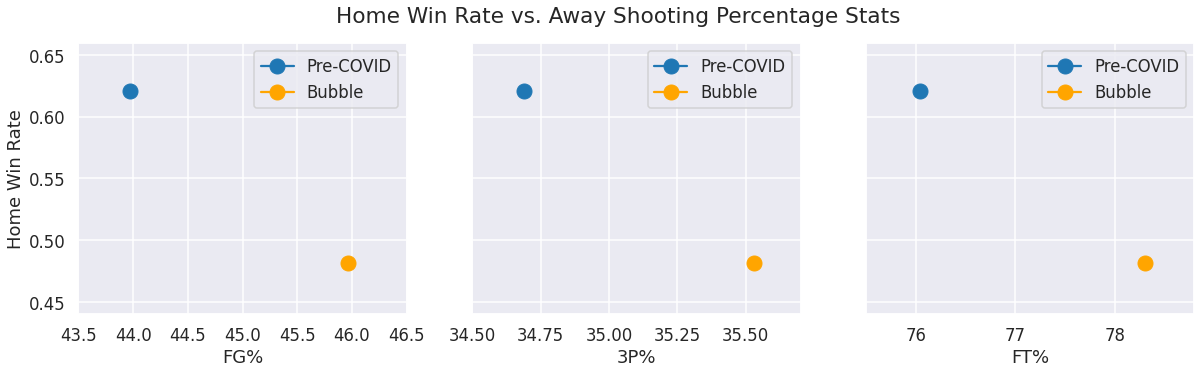

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, sharey=True, figsize=(20,5))
fig.suptitle("Home Win Rate vs. Away Shooting Percentage Stats")
away_fg=[fgperc_14_19_away.mean(),fgperc_19_20_away.mean()]
away_three=[threeperc_14_19_away.mean(),threeperc_19_20_away.mean()]
away_ft=[ftperc_14_19_away.mean(),ftperc_19_20_away.mean()]
ax1.set_ylabel("Home Win Rate")
plt.ylim([0.44,0.66])

# Away Field Goal
ax1.plot(away_fg[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax1.plot(away_fg[1],home_wr[1],marker='o',color="orange", markersize=15)
ax1.legend(['Pre-COVID','Bubble'], loc='upper right')
ax1.set_xlabel("FG%")
ax1.set_xlim([43.5,46.5])

# Away 3 Pointers
ax2.plot(away_three[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax2.plot(away_three[1],home_wr[1],marker='o',color="orange", markersize=15)
ax2.legend(['Pre-COVID','Bubble'], loc='upper right')
ax2.set_xlabel("3P%")
ax2.set_xlim([34.5,35.7])

# Away Free Throws
ax3.plot(away_ft[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax3.plot(away_ft[1],home_wr[1],marker='o',color="orange", markersize=15)
ax3.legend(['Pre-COVID','Bubble'], loc='upper right')
ax3.set_xlabel("FT%")
ax3.set_xlim([75.5,78.8])

plt.show()

**Field Goal Percentage**

There is a negative relationship between home win rate and the percentage of field goals made by away teams in a game. **When the home-team advantage is eliminated, the percentage of field goals made by away teams increases.**

**Three Point Percentage**

There is a negative relationship between home win rate and the percentage of three pointers made by away teams in a game. **When the home-team advantage is eliminated, the percentage of field goals made by away teams increases.**

**Free Throw Percentage**

There is a negative relationship between home win rate and the percentage of free throws made by away teams in a game. **When the home-team advantage is eliminated, the percentage of field goals made by away teams increases.**

### Distribution of Defensive Stats for Home Games

DREB%
Pre-COVID
mean: 76.85 	min: 60.0 	max: 96.0 	std: 7.23
Bubble
mean: 79.09 	min: 59.52 	max: 96.15 	std: 7.45

STL
Pre-COVID
mean: 7.43 	min: 1 	max: 20 	std: 2.82
Bubble
mean: 7.2 	min: 1 	max: 12 	std: 2.53

BLK
Pre-COVID
mean: 5.26 	min: 0 	max: 15 	std: 2.61
Bubble
mean: 4.14 	min: 0 	max: 9 	std: 2.04


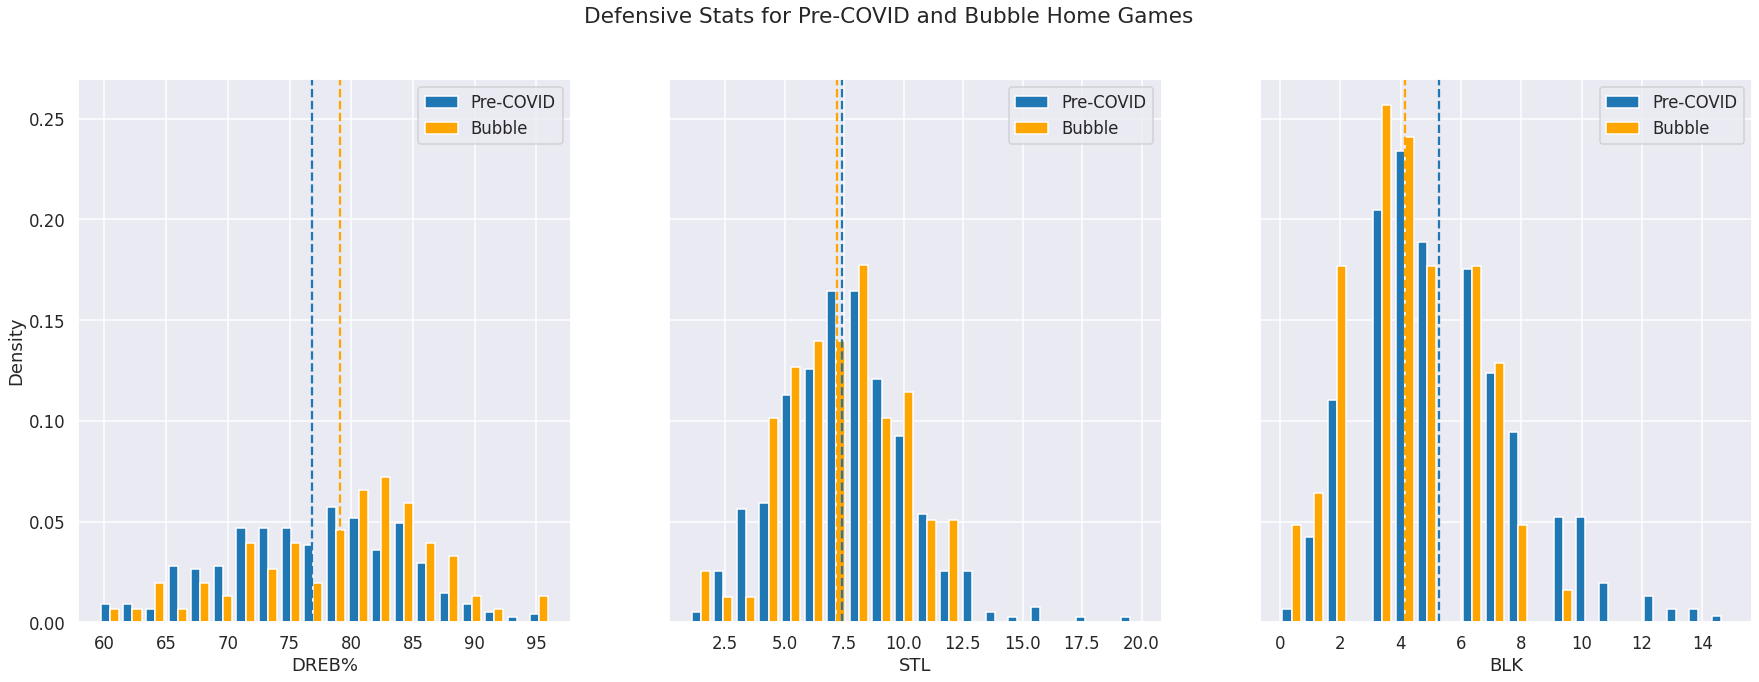

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, sharey=True, figsize=(30,10))

fig.suptitle('Defensive Stats for Pre-COVID and Bubble Home Games')

drebperc_14_19_home= df14_19['DREB%'].loc[df14_19['HOME/AWAY'] == 'Home']
drebperc_19_20_home= df19_20['DREB%'].loc[df19_20['HOME/AWAY'] == 'Home']

stl_14_19_home= df14_19['STL'].loc[df14_19['HOME/AWAY'] == 'Home']
stl_19_20_home= df19_20['STL'].loc[df19_20['HOME/AWAY'] == 'Home']

blk_14_19_home= df14_19['BLK'].loc[df14_19['HOME/AWAY'] == 'Home']
blk_19_20_home= df19_20['BLK'].loc[df19_20['HOME/AWAY'] == 'Home']

# Graph DREB% for pre-covid and bubble games of home teams
ax1.hist([drebperc_14_19_home, drebperc_19_20_home], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax1.axvline(drebperc_14_19_home.mean(), color="#1f77b4",linestyle='--')
ax1.axvline(drebperc_19_20_home.mean(), color="orange",linestyle='--')
ax1.legend(loc='upper right')
ax1.set_xlabel("DREB%")
ax1.set_ylabel("Density")
# Graph STL for pre-covid and bubble games of home teams
ax2.hist([stl_14_19_home, stl_19_20_home], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax2.axvline(stl_14_19_home.mean(), color="#1f77b4",linestyle='--')
ax2.axvline(stl_19_20_home.mean(), color="orange",linestyle='--')
ax2.legend(loc='upper right')
ax2.set_xlabel("STL")
# Graph BLK for pre-covid and bubble games of home teams
ax3.hist([blk_14_19_home, blk_19_20_home], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax3.axvline(blk_14_19_home.mean(), color="#1f77b4",linestyle='--')
ax3.axvline(blk_19_20_home.mean(), color="orange",linestyle='--')
ax3.legend(loc='upper right')
ax3.set_xlabel("BLK")

print('DREB%')
print('Pre-COVID')
print('mean:', round(drebperc_14_19_home.mean(),2), '\tmin:', round(drebperc_14_19_home.min(),2), '\tmax:', round(drebperc_14_19_home.max(),2), '\tstd:', round(drebperc_14_19_home.std(),2))
print('Bubble')
print('mean:', round(drebperc_19_20_home.mean(),2), '\tmin:', round(drebperc_19_20_home.min(),2), '\tmax:', round(drebperc_19_20_home.max(),2), '\tstd:', round(drebperc_19_20_home.std(),2))

print('\nSTL')
print('Pre-COVID')
print('mean:', round(stl_14_19_home.mean(),2), '\tmin:', stl_14_19_home.min(), '\tmax:', stl_14_19_home.max(), '\tstd:', round(stl_14_19_home.std(),2))
print('Bubble')
print('mean:', round(stl_19_20_home.mean(),2), '\tmin:', stl_19_20_home.min(), '\tmax:', stl_19_20_home.max(), '\tstd:', round(stl_19_20_home.std(),2))

print('\nBLK')
print('Pre-COVID')
print('mean:', round(blk_14_19_home.mean(),2), '\tmin:', blk_14_19_home.min(), '\tmax:', blk_14_19_home.max(), '\tstd:', round(blk_14_19_home.std(),2))
print('Bubble')
print('mean:', round(blk_19_20_home.mean(),2), '\tmin:', blk_19_20_home.min(), '\tmax:', blk_19_20_home.max(), '\tstd:', round(blk_19_20_home.std(),2))

plt.show()

**Defensive Rebound Percentage**

For the pre-COVID games, the shape of the distribution is normal and unimodal. For the Bubble games, the distribution is slightly negatively skewed and bimodal.

The location for pre-COVID games is centered at 76.9 percent ranging from 60.0 to 96.0 percent as opposed to that of the Bubble games centered at 79.1 percent and ranging from 59.5 to 96.2 percent.

The spread for pre-COVID games is measured by a standard deviation of 7.2 percent while the standard deviation for Bubble games is 7.5 percent.

There are no significant outliers in either distribution.

**Number of Steals**

For pre-COVID games, the shape of the distribution is positively skewed and unimodal.
For Bubble games, the distribution is normal and unimodal.

The location for pre-COVID games is centered at 7.4 steals ranging from 1 to 20 steals as opposed to that of the Bubble games centered at 7.2 steals and ranging from 1 to 12 steals.

The spread for pre-COVID games is measured by a standard deviation of 2.8 steals while the standard deviation for Bubble games is 2.5 steals.

There are two significant outliers in pre-COVID games at 17 and 20 steals.

**Number of Blocks**

For pre-COVID games, the shape of the distribution is positively skewed and unimodal.
For Bubble games, the shape of the distribution is normal and unimodal.

The location for pre-COVID games is centered at 5.3 blocks ranging from 0 to 15 blocks as opposed to that of the Bubble games centered at 4.1 blocks and ranging from 0 to 9 blocks.

The spread for pre-COVID games is measured by a standard deviation of 2.6 blocks while the standard deviation for Bubble games is 2.0 blocks.

There are a few significant outliers in pre-COVID distribution, with max at 15 blocks.

### Relationship Between Home Win Rates and Defensive Stats of Home Games

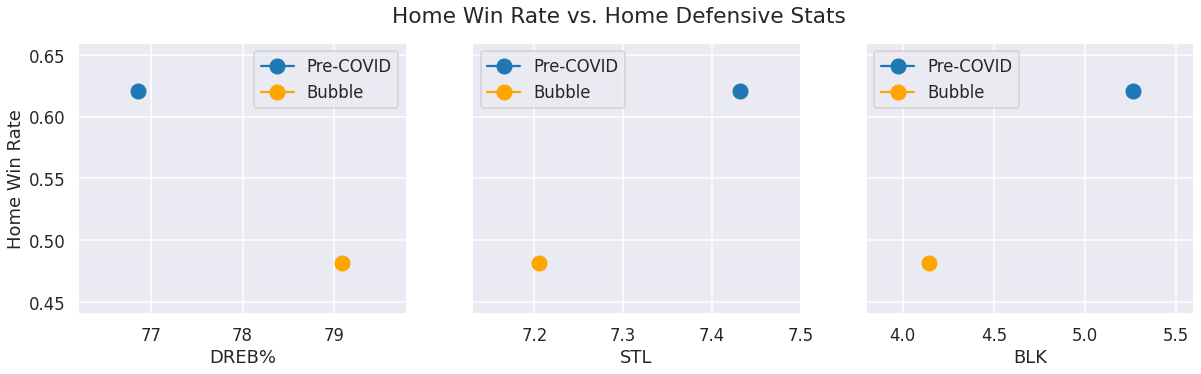

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, sharey=True, figsize=(20,5))
fig.suptitle("Home Win Rate vs. Home Defensive Stats")
home_dreb=[drebperc_14_19_home.mean(),drebperc_19_20_home.mean()]
home_stl=[stl_14_19_home.mean(),stl_19_20_home.mean()]
home_blk=[blk_14_19_home.mean(),blk_19_20_home.mean()]
ax1.set_ylabel("Home Win Rate")
plt.ylim([0.44,0.66])

# Home Defensive Rebound
ax1.plot(home_dreb[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax1.plot(home_dreb[1],home_wr[1],marker='o',color="orange", markersize=15)
ax1.legend(['Pre-COVID','Bubble'], loc='upper right')
ax1.set_xlabel("DREB%")
ax1.set_xlim([76.2,79.8])

# Home Steals
ax2.plot(home_stl[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax2.plot(home_stl[1],home_wr[1],marker='o',color="orange", markersize=15)
ax2.legend(['Pre-COVID','Bubble'], loc='upper left')
ax2.set_xlabel("STL")
ax2.set_xlim([7.13,7.5])

# Home Blocks
ax3.plot(home_blk[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax3.plot(home_blk[1],home_wr[1],marker='o',color="orange", markersize=15)
ax3.legend(['Pre-COVID','Bubble'], loc='upper left')
ax3.set_xlabel("BLK")
ax3.set_xlim([3.8,5.6])

plt.show()

**Defensive Rebound Percentage**

There is a negative relationship between home win rate and the percentage of defensive rebounds out of total rebounds made by home teams in a game. **When the home-team advantage is eliminated, the percentage of defensive rebounds made by home teams increases.**

**Number of Steals**

There is a positive relationship between home win rate and the number of steals made by home teams in a game. **When the home-team advantage is eliminated, the number of steals made by home teams decreases.**

**Number of Blocks**

There is a positive relationship between home win rate and the number of blocks made by home teams in a game. **When the home-team advantage is eliminated, the number of blocks made by home teams decreases.**

### Distribution of Defensive Stats for Away Games

DREB%
Pre-COVID
mean: 77.12 	min: 55.1 	max: 95.45 	std: 7.2
Bubble
mean: 80.28 	min: 57.5 	max: 93.33 	std: 7.17

STL
Pre-COVID
mean: 7.32 	min: 1 	max: 16 	std: 2.89
Bubble
mean: 6.87 	min: 2 	max: 14 	std: 2.86

BLK
Pre-COVID
mean: 4.6 	min: 0 	max: 13 	std: 2.44
Bubble
mean: 4.37 	min: 1 	max: 9 	std: 1.9


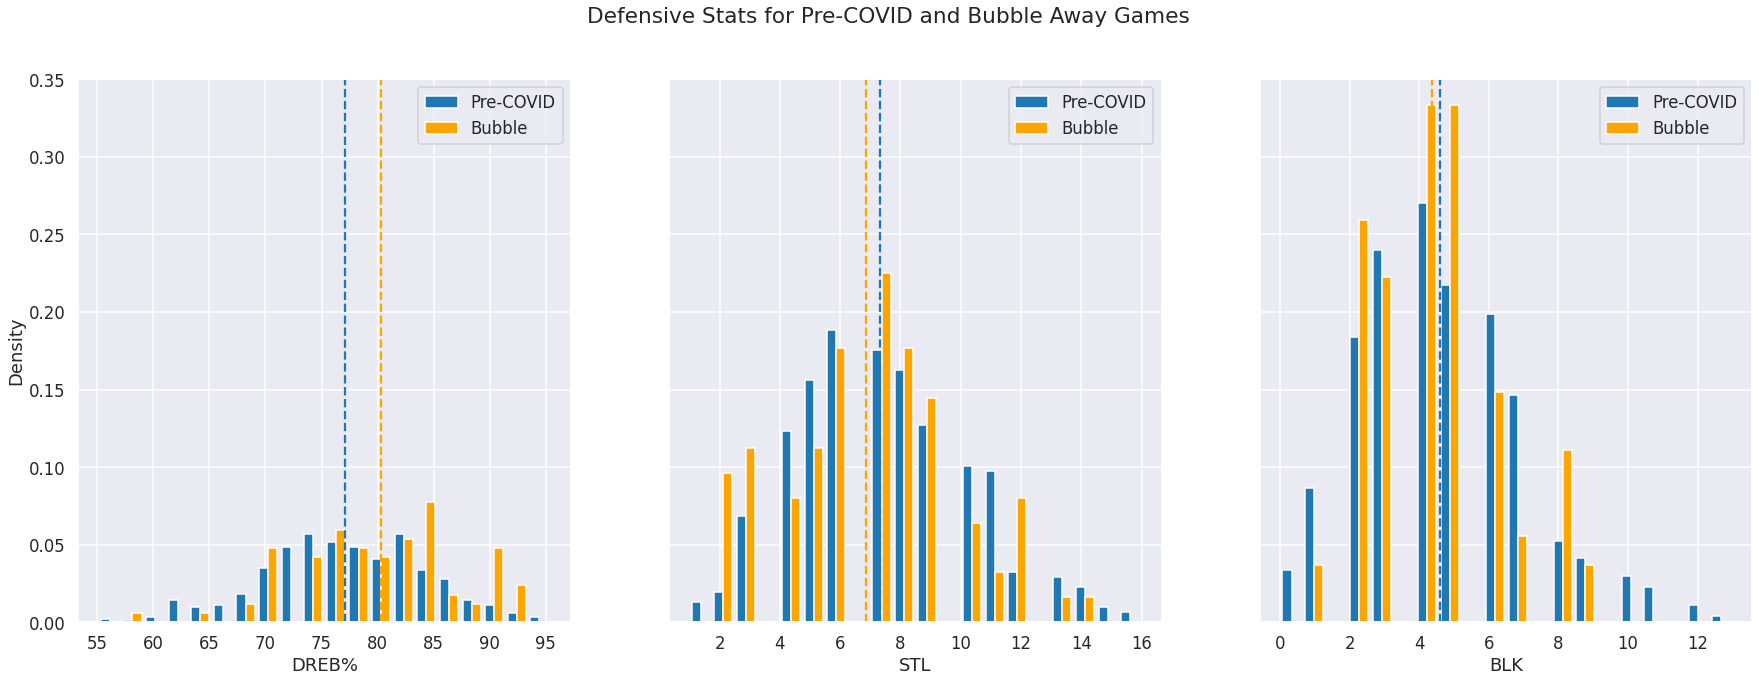

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, sharey=True, figsize=(30,10))

fig.suptitle('Defensive Stats for Pre-COVID and Bubble Away Games')

drebperc_14_19_away= df14_19['DREB%'].loc[df14_19['HOME/AWAY'] == 'Away']
drebperc_19_20_away= df19_20['DREB%'].loc[df19_20['HOME/AWAY'] == 'Away']

stl_14_19_away= df14_19['STL'].loc[df14_19['HOME/AWAY'] == 'Away']
stl_19_20_away= df19_20['STL'].loc[df19_20['HOME/AWAY'] == 'Away']

blk_14_19_away= df14_19['BLK'].loc[df14_19['HOME/AWAY'] == 'Away']
blk_19_20_away= df19_20['BLK'].loc[df19_20['HOME/AWAY'] == 'Away']

# Graph DREB% for pre-covid and bubble games of away teams
ax1.hist([drebperc_14_19_away, drebperc_19_20_away], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax1.axvline(drebperc_14_19_away.mean(), color="#1f77b4",linestyle='--')
ax1.axvline(drebperc_19_20_away.mean(), color="orange",linestyle='--')
ax1.legend(loc='upper right')
ax1.set_xlabel("DREB%")
ax1.set_ylabel("Density")
# Graph STL for pre-covid and bubble games of away teams
ax2.hist([stl_14_19_away, stl_19_20_away], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax2.axvline(stl_14_19_away.mean(), color="#1f77b4",linestyle='--')
ax2.axvline(stl_19_20_away.mean(), color="orange",linestyle='--')
ax2.legend(loc='upper right')
ax2.set_xlabel("STL")
# Graph BLK for pre-covid and bubble games of away teams
ax3.hist([blk_14_19_away, blk_19_20_away], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax3.axvline(blk_14_19_away.mean(), color="#1f77b4",linestyle='--')
ax3.axvline(blk_19_20_away.mean(), color="orange",linestyle='--')
ax3.legend(loc='upper right')
ax3.set_xlabel("BLK")

print('DREB%')
print('Pre-COVID')
print('mean:', round(drebperc_14_19_away.mean(),2), '\tmin:', round(drebperc_14_19_away.min(),2), '\tmax:', round(drebperc_14_19_away.max(),2), '\tstd:', round(drebperc_14_19_away.std(),2))
print('Bubble')
print('mean:', round(drebperc_19_20_away.mean(),2), '\tmin:', round(drebperc_19_20_away.min(),2), '\tmax:', round(drebperc_19_20_away.max(),2), '\tstd:', round(drebperc_19_20_away.std(),2))

print('\nSTL')
print('Pre-COVID')
print('mean:', round(stl_14_19_away.mean(),2), '\tmin:', stl_14_19_away.min(), '\tmax:', stl_14_19_away.max(), '\tstd:', round(stl_14_19_away.std(),2))
print('Bubble')
print('mean:', round(stl_19_20_away.mean(),2), '\tmin:', stl_19_20_away.min(), '\tmax:', stl_19_20_away.max(), '\tstd:', round(stl_19_20_away.std(),2))

print('\nBLK')
print('Pre-COVID')
print('mean:', round(blk_14_19_away.mean(),2), '\tmin:', blk_14_19_away.min(), '\tmax:', blk_14_19_away.max(), '\tstd:', round(blk_14_19_away.std(),2))
print('Bubble')
print('mean:', round(blk_19_20_away.mean(),2), '\tmin:', blk_19_20_away.min(), '\tmax:', blk_19_20_away.max(), '\tstd:', round(blk_19_20_away.std(),2))

plt.show()

**Defensive Rebound Percentage**

For the pre-COVID games, the shape of the distribution is bimodal. For the Bubble games, the distribution is multimodal.

The location for pre-COVID games is centered at 77.1 percent ranging from 55.1 to 95.5 percent as opposed to that of the Bubble games centered at 80.3 percent and ranging from 57.5 to 93.3 percent.

The spread for pre-COVID games is measured by a standard deviation of 7.2 percent while the standard deviation for Bubble games is 7.17 percent.

There is one outlier of 57.5% within the Bubble games.

**Number of Steals**

For both the pre-COVID and Bubble games, the shape of the distributions are positively skewed and unimodal.

The location for pre-COVID games is centered at 7.3 steals ranging from 1 to 16 steals as opposed to that of the Bubble games centered at 6.9 steals and ranging from 2 to 14 steals.

The spread for pre-COVID games is measured by a standard deviation of 2.89 steals while the standard deviation for Bubble games is 2.86 steals.

There are a few significant outliers in pre-COVID games with max 16 steals.

**Number of Blocks**

For pre-COVID games, the distribution is positively skewed and unimodal.
For Bubble games, the shape of the distribution is normal and unimodal.

The location for pre-COVID games is centered at 4.6 blocks ranging from 0 to 13 blocks as opposed to that of the Bubble games centered at 4.4 blocks and ranging from 1 to 9 blocks.

The spread for pre-COVID games is measured by a standard deviation of 2.4 blocks while the standard deviation for Bubble games is 1.9 blocks.

There are a few significant outliers in pre-COVID distribution, with max at 13 blocks.

### Relationship Between Home Win Rates and Defensive Stats of Away Games

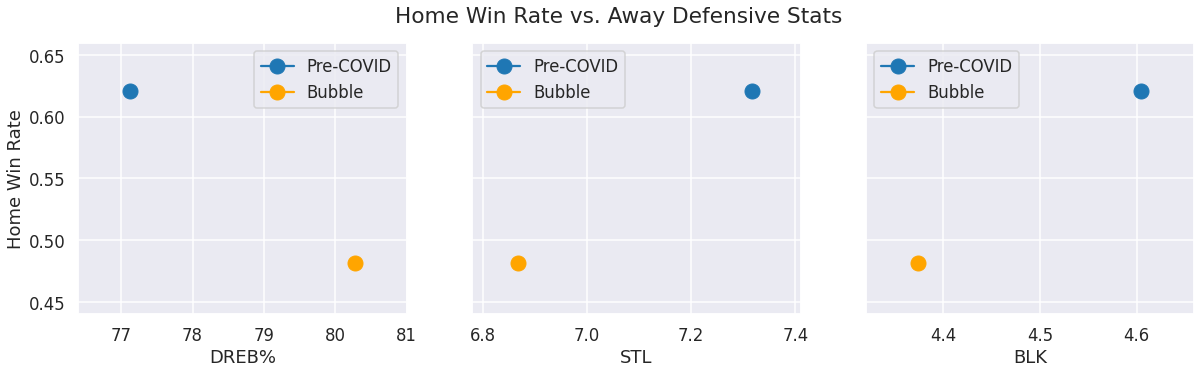

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, sharey=True, figsize=(20,5))
fig.suptitle("Home Win Rate vs. Away Defensive Stats")
away_dreb=[drebperc_14_19_away.mean(),drebperc_19_20_away.mean()]
away_stl=[stl_14_19_away.mean(),stl_19_20_away.mean()]
away_blk=[blk_14_19_away.mean(),blk_19_20_away.mean()]
ax1.set_ylabel("Home Win Rate")
plt.ylim([0.44,0.66])

# Away Defensive Rebound
ax1.plot(away_dreb[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax1.plot(away_dreb[1],home_wr[1],marker='o',color="orange", markersize=15)
ax1.legend(['Pre-COVID','Bubble'], loc='upper right')
ax1.set_xlabel("DREB%")
ax1.set_xlim([76.4,81])

# Away Steals
ax2.plot(away_stl[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax2.plot(away_stl[1],home_wr[1],marker='o',color="orange", markersize=15)
ax2.legend(['Pre-COVID','Bubble'], loc='upper left')
ax2.set_xlabel("STL")
ax2.set_xlim([6.78,7.41])

# Away Blocks
ax3.plot(away_blk[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax3.plot(away_blk[1],home_wr[1],marker='o',color="orange", markersize=15)
ax3.legend(['Pre-COVID','Bubble'], loc='upper left')
ax3.set_xlabel("BLK")
ax3.set_xlim([4.32,4.66])

plt.show()

**Defensive Rebound Percentage**

There is a negative relationship between home win rate and the percentage of defensive rebounds out of total rebounds made by away teams in a game. **When the home-team advantage is eliminated, the percentage of defensive rebounds made by away teams increases.**

**Number of Steals**

There is a positive relationship between home win rate and the number of steals made by away teams in a game. **When the home-team advantage is eliminated, the number of steals made by away teams decreases.**

**Number of Blocks**

There is a positive relationship between home win rate and the number of blocks made by away teams in a game. **When the home-team advantage is eliminated, the number of blocks made by away teams decreases.**

### Distribution of Additional Offensive Stats for Home Games

OREB%
Pre-COVID
mean: 23.15 	min: 4.0 	max: 40.0 	std: 7.23
Bubble
mean: 20.91 	min: 3.85 	max: 40.48 	std: 7.45

AST
Pre-COVID
mean: 22.41 	min: 10 	max: 39 	std: 5.28
Bubble
mean: 22.82 	min: 12 	max: 33 	std: 4.49

TOV
Pre-COVID
mean: 12.99 	min: 3 	max: 25 	std: 3.72
Bubble
mean: 13.63 	min: 7 	max: 24 	std: 3.56


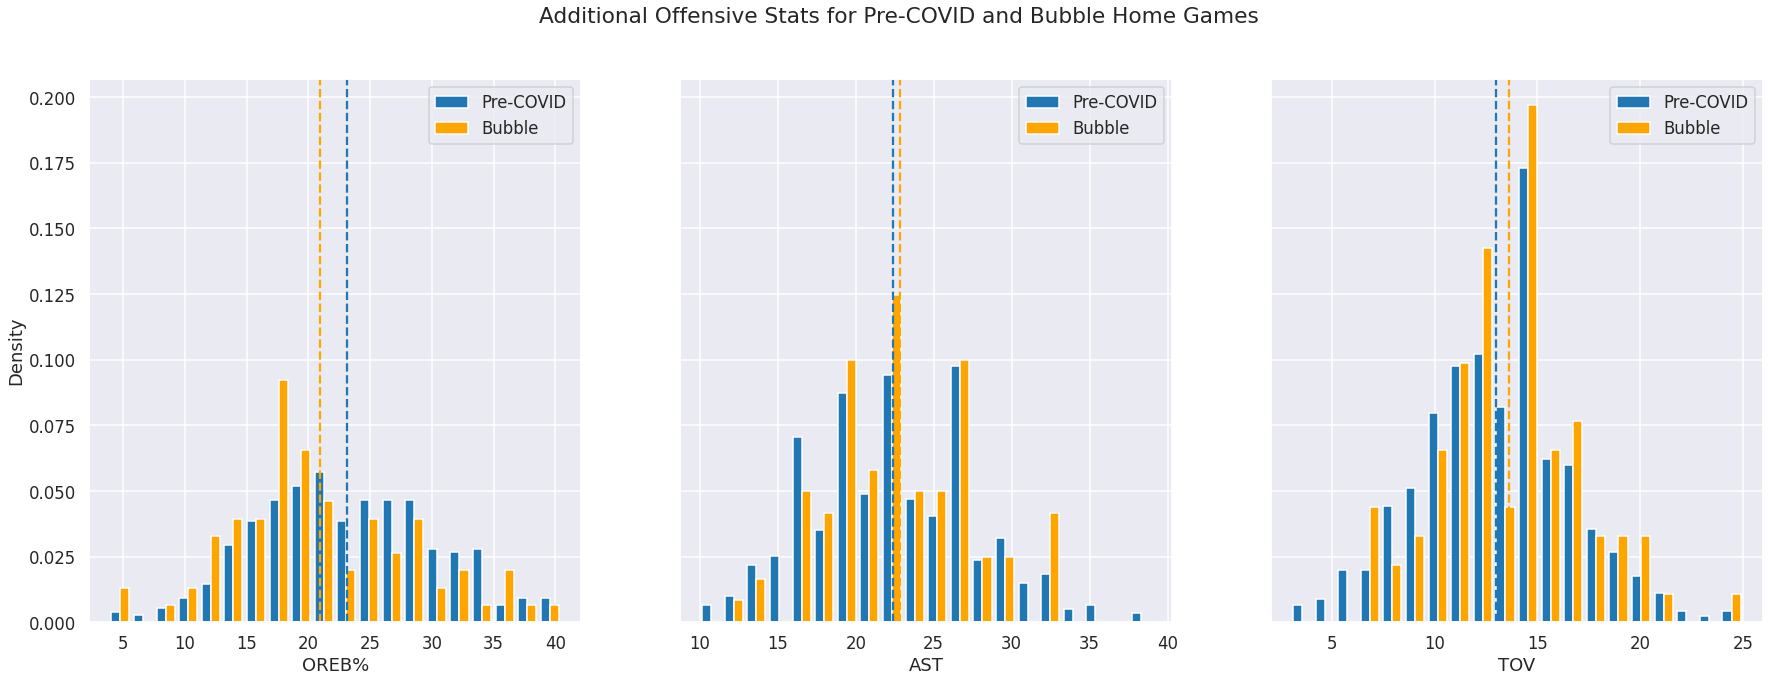

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, sharey=True, figsize=(30,10))

fig.suptitle('Additional Offensive Stats for Pre-COVID and Bubble Home Games')

orebperc_14_19_home= df14_19['OREB%'].loc[df14_19['HOME/AWAY'] == 'Home']
orebperc_19_20_home= df19_20['OREB%'].loc[df19_20['HOME/AWAY'] == 'Home']

ast_14_19_home= df14_19['AST'].loc[df14_19['HOME/AWAY'] == 'Home']
ast_19_20_home= df19_20['AST'].loc[df19_20['HOME/AWAY'] == 'Home']

tov_14_19_home= df14_19['TOV'].loc[df14_19['HOME/AWAY'] == 'Home']
tov_19_20_home= df19_20['TOV'].loc[df19_20['HOME/AWAY'] == 'Home']

# Graph OREB% for pre-covid and bubble games of home teams
ax1.hist([orebperc_14_19_home, orebperc_19_20_home], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax1.axvline(orebperc_14_19_home.mean(), color="#1f77b4",linestyle='--')
ax1.axvline(orebperc_19_20_home.mean(), color="orange",linestyle='--')
ax1.legend(loc='upper right')
ax1.set_xlabel("OREB%")
ax1.set_ylabel("Density")
# Graph AST for pre-covid and bubble games of home teams
ax2.hist([ast_14_19_home, ast_19_20_home], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax2.axvline(ast_14_19_home.mean(), color="#1f77b4",linestyle='--')
ax2.axvline(ast_19_20_home.mean(), color="orange",linestyle='--')
ax2.legend(loc='upper right')
ax2.set_xlabel("AST")
# Graph TOV for pre-covid and bubble games of home teams
ax3.hist([tov_14_19_home, tov_19_20_home], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax3.axvline(tov_14_19_home.mean(), color="#1f77b4",linestyle='--')
ax3.axvline(tov_19_20_home.mean(), color="orange",linestyle='--')
ax3.legend(loc='upper right')
ax3.set_xlabel("TOV")

print('OREB%')
print('Pre-COVID')
print('mean:', round(orebperc_14_19_home.mean(),2), '\tmin:', round(orebperc_14_19_home.min(),2), '\tmax:', round(orebperc_14_19_home.max(),2), '\tstd:', round(orebperc_14_19_home.std(),2))
print('Bubble')
print('mean:', round(orebperc_19_20_home.mean(),2), '\tmin:', round(orebperc_19_20_home.min(),2), '\tmax:', round(orebperc_19_20_home.max(),2), '\tstd:', round(orebperc_19_20_home.std(),2))

print('\nAST')
print('Pre-COVID')
print('mean:', round(ast_14_19_home.mean(),2), '\tmin:', ast_14_19_home.min(), '\tmax:', ast_14_19_home.max(), '\tstd:', round(ast_14_19_home.std(),2))
print('Bubble')
print('mean:', round(ast_19_20_home.mean(),2), '\tmin:', ast_19_20_home.min(), '\tmax:', ast_19_20_home.max(), '\tstd:', round(ast_19_20_home.std(),2))

print('\nTOV')
print('Pre-COVID')
print('mean:', round(tov_14_19_home.mean(),2), '\tmin:', tov_14_19_home.min(), '\tmax:', tov_14_19_home.max(), '\tstd:', round(tov_14_19_home.std(),2))
print('Bubble')
print('mean:', round(tov_19_20_home.mean(),2), '\tmin:', tov_19_20_home.min(), '\tmax:', tov_19_20_home.max(), '\tstd:', round(tov_19_20_home.std(),2))

plt.show()

**Offensive Rebound Percentage**

For the pre-COVID games, the shape of the distribution is normal and unimodal. For the Bubble games, the distribution is positively skewed and unimodal.

The location for pre-COVID games is centered at 23.2 percent ranging from 4.0 to 40.0 percent as opposed to that of the Bubble games centered at 20.9 percent and ranging from 3.9 to 40.5 percent.

The spread for pre-COVID games is measured by a standard deviation of 7.2 percent while the standard deviation for Bubble games is 7.5 percent.

There are no significant outliers in either distribution.

**Number of Assists**

For both the pre-COVID and Bubble games, the shape of the distributions are normal and unimodal.

The location for pre-COVID games is centered at 22.4 assists ranging from 10 to 39 assists as opposed to that of the Bubble games centered at 22.8 assists and ranging from 12 to 33 assists.

The spread for pre-COVID games is measured by a standard deviation of 5.3 assists while the standard deviation for Bubble games is 4.5 assists.

There are no significant outliers in either distribution.

**Number of Turnovers**

For both the pre-COVID and Bubble games, the shape of the distributions are normal and unimodal.

The location for pre-COVID games is centered at 13.0 turnovers ranging from 3 to 25 turnovers as opposed to that of the Bubble games centered at 13.6 turnovers and ranging from 7 to 24 turnovers.

The spread for pre-COVID games is measured by a standard deviation of 3.7 turnovers while the standard deviation for Bubble games is 3.6 turnovers.

There are no significant outliers in either distribution.

### Relationship Between Home Win Rates and Additional Offensive Stats of Home Games

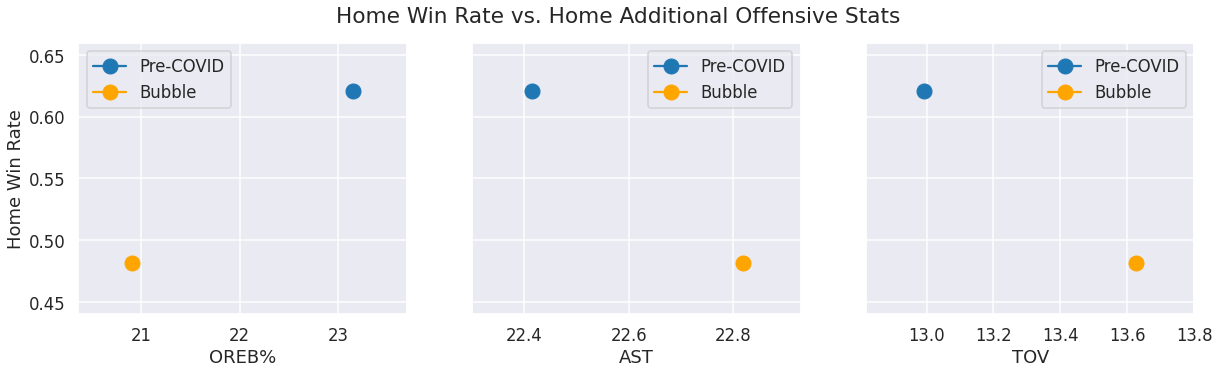

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, sharey=True, figsize=(20,5))
fig.suptitle("Home Win Rate vs. Home Additional Offensive Stats")
home_oreb=[orebperc_14_19_home.mean(),orebperc_19_20_home.mean()]
home_ast=[ast_14_19_home.mean(),ast_19_20_home.mean()]
home_tov=[tov_14_19_home.mean(),tov_19_20_home.mean()]
ax1.set_ylabel("Home Win Rate")
plt.ylim([0.44,0.66])

# Home Offensive Rebound
ax1.plot(home_oreb[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax1.plot(home_oreb[1],home_wr[1],marker='o',color="orange", markersize=15)
ax1.legend(['Pre-COVID','Bubble'], loc='upper left')
ax1.set_xlabel("OREB%")
ax1.set_xlim([20.36,23.7])

# Home Assists
ax2.plot(home_ast[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax2.plot(home_ast[1],home_wr[1],marker='o',color="orange", markersize=15)
ax2.legend(['Pre-COVID','Bubble'], loc='upper right')
ax2.set_xlabel("AST")
ax2.set_xlim([22.3,22.93])

# Home Turnovers
ax3.plot(home_tov[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax3.plot(home_tov[1],home_wr[1],marker='o',color="orange", markersize=15)
ax3.legend(['Pre-COVID','Bubble'], loc='upper right')
ax3.set_xlabel("TOV")
ax3.set_xlim([12.82,13.8])

plt.show()

**Offensive Rebound Percentage**

There is a positive relationship between home win rate and the percentage of offensive rebounds out of total rebounds made by home teams in a game. **When the home-team advantage is eliminated, the percentage of offensive rebounds made by home teams decreases.**

**Number of Assists**

There is a negative relationship between home win rate and the number of assists made by home teams in a game. **When the home-team advantage is eliminated, the number of assists made by home teams increases.**

**Number of Turnovers**

There is a negative relationship between home win rate and the number of turnovers made by home teams in a game. **When the home-team advantage is eliminated, the number of turnovers made by home teams increases.**

### Distribution of Additional Offensive Stats for Away Games

OREB%
Pre-COVID
mean: 22.88 	min: 4.55 	max: 44.9 	std: 7.2
Bubble
mean: 19.72 	min: 6.67 	max: 42.5 	std: 7.17

AST
Pre-COVID
mean: 20.99 	min: 9 	max: 38 	std: 4.86
Bubble
mean: 22.92 	min: 11 	max: 39 	std: 4.79

TOV
Pre-COVID
mean: 13.66 	min: 3 	max: 28 	std: 3.88
Bubble
mean: 14.37 	min: 6 	max: 23 	std: 3.71


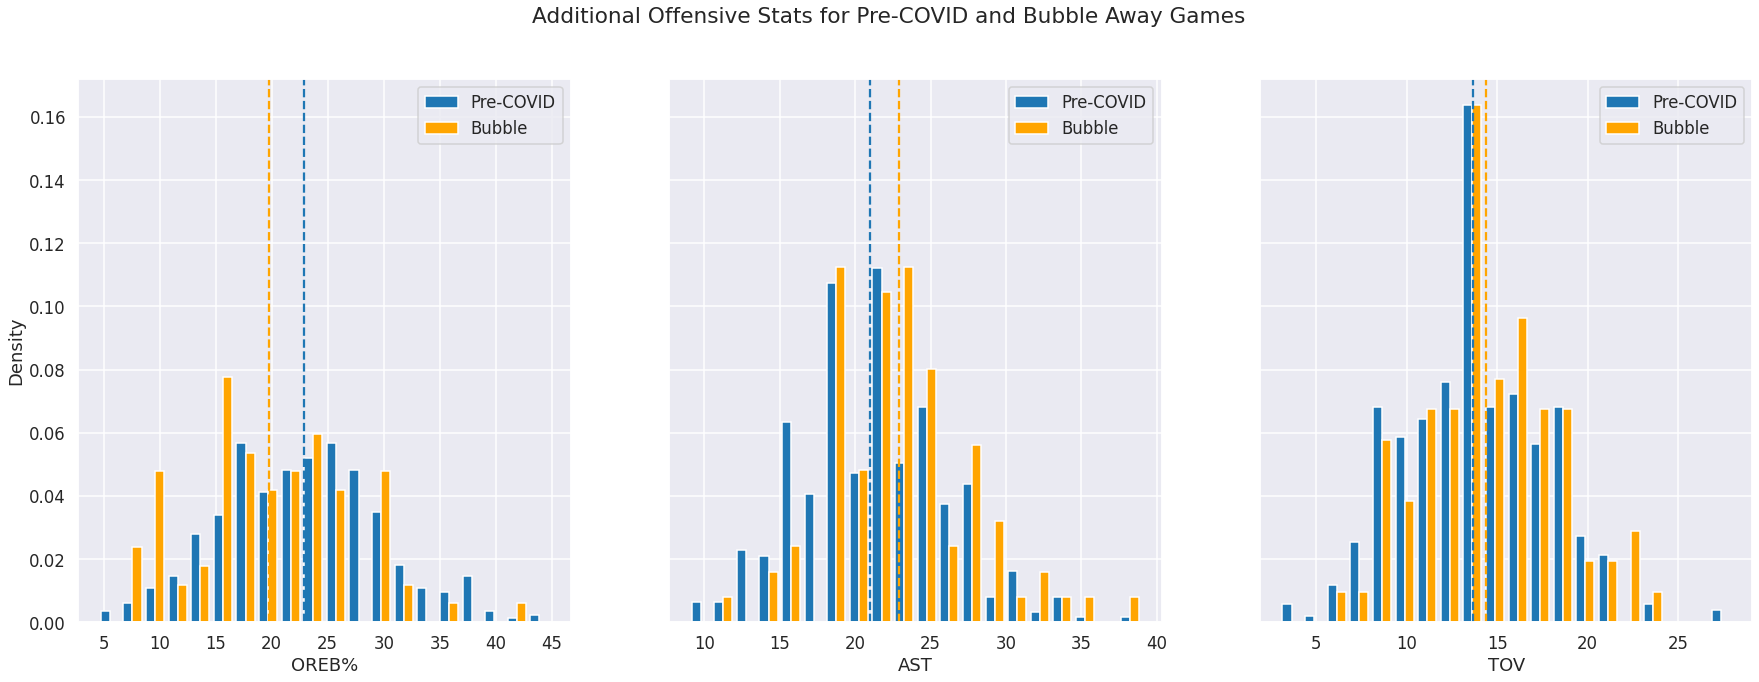

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, sharey=True, figsize=(30,10))

fig.suptitle('Additional Offensive Stats for Pre-COVID and Bubble Away Games')

orebperc_14_19_away= df14_19['OREB%'].loc[df14_19['HOME/AWAY'] == 'Away']
orebperc_19_20_away= df19_20['OREB%'].loc[df19_20['HOME/AWAY'] == 'Away']

ast_14_19_away= df14_19['AST'].loc[df14_19['HOME/AWAY'] == 'Away']
ast_19_20_away= df19_20['AST'].loc[df19_20['HOME/AWAY'] == 'Away']

tov_14_19_away= df14_19['TOV'].loc[df14_19['HOME/AWAY'] == 'Away']
tov_19_20_away= df19_20['TOV'].loc[df19_20['HOME/AWAY'] == 'Away']

# Graph OREB% for pre-covid and bubble games of away teams
ax1.hist([orebperc_14_19_away, orebperc_19_20_away], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax1.axvline(orebperc_14_19_away.mean(), color="#1f77b4",linestyle='--')
ax1.axvline(orebperc_19_20_away.mean(), color="orange",linestyle='--')
ax1.legend(loc='upper right')
ax1.set_xlabel("OREB%")
ax1.set_ylabel("Density")
# Graph AST for pre-covid and bubble games of away teams
ax2.hist([ast_14_19_away, ast_19_20_away], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax2.axvline(ast_14_19_away.mean(), color="#1f77b4",linestyle='--')
ax2.axvline(ast_19_20_away.mean(), color="orange",linestyle='--')
ax2.legend(loc='upper right')
ax2.set_xlabel("AST")
# Graph TOV for pre-covid and bubble games of away teams
ax3.hist([tov_14_19_away, tov_19_20_away], bins=20 ,color=["#1f77b4","orange"],label=['Pre-COVID', 'Bubble'],density=True)
ax3.axvline(tov_14_19_away.mean(), color="#1f77b4",linestyle='--')
ax3.axvline(tov_19_20_away.mean(), color="orange",linestyle='--')
ax3.legend(loc='upper right')
ax3.set_xlabel("TOV")

print('OREB%')
print('Pre-COVID')
print('mean:', round(orebperc_14_19_away.mean(),2), '\tmin:', round(orebperc_14_19_away.min(),2), '\tmax:', round(orebperc_14_19_away.max(),2), '\tstd:', round(orebperc_14_19_away.std(),2))
print('Bubble')
print('mean:', round(orebperc_19_20_away.mean(),2), '\tmin:', round(orebperc_19_20_away.min(),2), '\tmax:', round(orebperc_19_20_away.max(),2), '\tstd:', round(orebperc_19_20_away.std(),2))

print('\nAST')
print('Pre-COVID')
print('mean:', round(ast_14_19_away.mean(),2), '\tmin:', ast_14_19_away.min(), '\tmax:', ast_14_19_away.max(), '\tstd:', round(ast_14_19_away.std(),2))
print('Bubble')
print('mean:', round(ast_19_20_away.mean(),2), '\tmin:', ast_19_20_away.min(), '\tmax:', ast_19_20_away.max(), '\tstd:', round(ast_19_20_away.std(),2))

print('\nTOV')
print('Pre-COVID')
print('mean:', round(tov_14_19_away.mean(),2), '\tmin:', tov_14_19_away.min(), '\tmax:', tov_14_19_away.max(), '\tstd:', round(tov_14_19_away.std(),2))
print('Bubble')
print('mean:', round(tov_19_20_away.mean(),2), '\tmin:', tov_19_20_away.min(), '\tmax:', tov_19_20_away.max(), '\tstd:', round(tov_19_20_away.std(),2))

plt.show()

**Offensive Rebound Percentage**

For the pre-COVID games, the shape of the distribution is bimodal. For the Bubble games, the distribution is positively skewed and multimodal.

The location for pre-COVID games is centered at 22.9 percent ranging from 4.6 to 45.0 percent as opposed to that of the Bubble games centered at 19.7 percent and ranging from 6.7 to 42.5 percent.

The spread for pre-COVID games is measured by a standard deviation of 7.2 percent while the standard deviation for Bubble games is 7.17 percent.

There are no significant outliers in either distribution.

**Number of Assists**

For both the pre-COVID and Bubble games, the shape of the distributions are normal and unimodal.

The location for pre-COVID games is centered at 21.0 assists ranging from 9 to 38 assists as opposed to that of the Bubble games centered at 22.9 assists and ranging from 11 to 39 assists.

The spread for pre-COVID games is measured by a standard deviation of 4.9 assists while the standard deviation for Bubble games is 4.8 assists.

There is a significant outlier in pre-COVID distribution at 38.

**Number of Turnovers**

For both the pre-COVID and Bubble games, the shape of the distributions are normal and unimodal.

The location for pre-COVID games is centered at 13.7 turnovers ranging from 3 to 28 turnovers as opposed to that of the Bubble games centered at 14.4 turnovers and ranging from 6 to 23 turnovers.

The spread for pre-COVID games is measured by a standard deviation of 3.9 turnovers while the standard deviation for Bubble games is 3.7 turnovers.

There are no significant outliers in either distribution.

### Relationship Between Home Win Rates and Additional Offensive Stats of Away Games

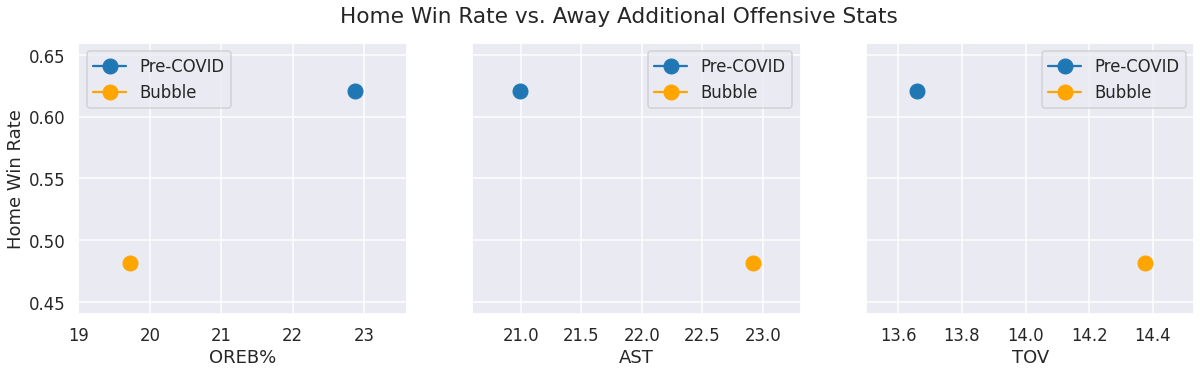

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, sharey=True, figsize=(20,5))
fig.suptitle("Home Win Rate vs. Away Additional Offensive Stats")
away_oreb=[orebperc_14_19_away.mean(),orebperc_19_20_away.mean()]
away_ast=[ast_14_19_away.mean(),ast_19_20_away.mean()]
away_tov=[tov_14_19_away.mean(),tov_19_20_away.mean()]
ax1.set_ylabel("Home Win Rate")
plt.ylim([0.44,0.66])

# Away Offensive Rebound
ax1.plot(away_oreb[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax1.plot(away_oreb[1],home_wr[1],marker='o',color="orange", markersize=15)
ax1.legend(['Pre-COVID','Bubble'], loc='upper left')
ax1.set_xlabel("OREB%")
ax1.set_xlim([19,23.6])

# Away Assists
ax2.plot(away_ast[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax2.plot(away_ast[1],home_wr[1],marker='o',color="orange", markersize=15)
ax2.legend(['Pre-COVID','Bubble'], loc='upper right')
ax2.set_xlabel("AST")
ax2.set_xlim([20.6,23.31])

# Away Turnovers
ax3.plot(away_tov[0],home_wr[0],marker='o',color="#1f77b4", markersize=15)
ax3.plot(away_tov[1],home_wr[1],marker='o',color="orange", markersize=15)
ax3.legend(['Pre-COVID','Bubble'], loc='upper right')
ax3.set_xlabel("TOV")
ax3.set_xlim([13.5,14.53])

plt.show()

**Offensive Rebound Percentage**

There is a positive relationship between home win rate and the percentage of defensive rebounds out of total rebounds made by away teams in a game. **When the home-team advantage is eliminated, the percentage of offensive rebounds made by away teams decreases.**

**Number of Assists**

There is a negative relationship between home win rate and the number of assists made by away teams in a game. **When the home-team advantage is eliminated, the number of assists made by away teams increases.**

**Number of Turnovers**

There is a negative relationship between home win rate and the number of turnovers made by away teams in a game. **When the home-team advantage is eliminated, the number of turnovers made by away teams increases.**

# Statistical Analysis

To statistically analyze our data, we begin by performing z-tests on the winning percentages and the game statistics for the home and away teams, comparing pre-COVID and Bubble playoffs.

When the standard deviation is available and the sample is large, the **z-test** can be used to determine whether two sample means show a significant difference between the means of two populations. To find these occurrences in our data, we believe it is appropriate to use this parametric test.

To support our conclusions from the z-tests, we perform one nonparametric test for each statistic. Because the win rates for home teams is a categorical variable, we will use Fisher's exact test. Since the Wilcoxon rank-sum test is used for quantitative data, we will apply this technique to the other game statistics.

**Fisher’s exact test** is used to determine if there are nonrandom associations between categorical variables. It analyzes contigency tables with many sample sizes. As it evaluates the association between two classifications of categorical data, we will perform Fisher's exact test for our study of the relationship between home team advantage and COVID-19. A significant difference will demonstrate that the home team advantage was lost due to COVID-19.

**Wilcoxon rank-sum test** is a non-parametric statistical test used to determine whether two independent samples were selected from the same populations, having the same distribution. This test uses ranks and medians for two different sample groups to produce a test statistic determining if the two groups are not from the same population. It will indicate whether a parameter is significantly different between two samples.

_**For each of the above tests, we consider a significance level of 5%, or 0.05.**_



In [ ]:
#Winning percentages for 2014-2019 home vs. 2020 home,z-test
#test statistic, p-value

sm.stats.ztest(pre_covid_home_wrs,tuple([wr_19_20]))

(1.9272283260491019, 0.05395118133962427)

The results of our z-test do not reveal a significant difference in the home team winning percentages when comparing pre-COVID playoffs to the Bubble playoffs.

In [ ]:
#Winning percentages for 2014-2019 home vs. 2020 home, Fisher's test
df14_19_setup=df14_19[df14_19["HOME/AWAY"]=="Home"].rename(columns={'3P%':"Pre-Covid"})[["Win/Loss","Pre-Covid"]]
df19_20_setup=df19_20[df19_20["HOME/AWAY"]=="Home"].rename(columns={'3P%':"Bubble"})[["Win/Loss","Bubble"]]
home_pre_covid_table=pd.pivot_table(df14_19_setup,index="Win/Loss",aggfunc="count")
home_covid_table=pd.pivot_table(df19_20_setup,index="Win/Loss",aggfunc="count")
win_loss_table = pd.concat([home_pre_covid_table, home_covid_table], ignore_index=False,axis=1)
#p-value
stats.fisher_exact(win_loss_table)[1]

0.01981500849862067

The results of our Fisher's exact test reveal a significant difference in the home team winning percentages when comparing pre-COVID playoffs to the Bubble playoffs.

In [ ]:
#Z-test on variables for 2014-2019 home vs. 2020 home
variables=list(["PTS",	"FG%",	"3P%",	"FT%",	"OREB%",	"DREB%",	"AST",	"STL",	"BLK",	"TOV"])
z=[]
for i in variables:
  z.append(sm.stats.ztest(df14_19[df14_19["HOME/AWAY"]=="Home"][i],df19_20[df19_20["HOME/AWAY"]=="Home"][i]))
z_values=pd.DataFrame(data=z,index=variables,columns=["Test_Statistic","p-value"])
z_values

,Test_Statistic,p-value
PTS,-2.740630,0.006132
FG%,-0.141037,0.887840
3P%,-1.133451,0.257025
FT%,-2.827754,0.004688
OREB%,2.566301,0.010279
DREB%,-2.566301,0.010279
AST,-0.652106,0.514333
STL,0.680273,0.496332
BLK,3.675187,0.000238
TOV,-1.426774,0.153645


The results of our z-test reveal a significant difference in the following home team game stats when comparing pre-COVID playoffs to the Bubble playoffs:
 - PTS
 - FT%
 - OREB%
 - DREB%
 - BLK

The following game stats were not significantly different:
 - FG%
 - 3P%
 - AST
 - STL
 - TOV

In [ ]:
#Wilcoxon test on variables for 2014-2019 home vs. 2020 home
wil=[]
for i in variables:
    wil.append(stats.ranksums(df14_19[df14_19["HOME/AWAY"]=="Home"][i],df19_20[df19_20["HOME/AWAY"]=="Home"][i]))
wil_values=pd.DataFrame(data=wil,index=variables,columns=["Test_Statistic","p-value"])
wil_values

,Test_Statistic,p-value
PTS,-2.520284,0.011726
FG%,-0.010139,0.991911
3P%,-0.837278,0.402436
FT%,-2.908930,0.003627
OREB%,2.698554,0.006964
DREB%,-2.698554,0.006964
AST,-0.705054,0.480776
STL,0.396672,0.691609
BLK,3.277721,0.001046
TOV,-1.345897,0.178336


The results of our Wilcoxon test reveal a significant difference in the following home team game stats when comparing pre-COVID playoffs to the Bubble playoffs:
 - PTS
 - FT%
 - OREB%
 - DREB%
 - BLK

The following game stats were not significantly different:
 - FG%
 - 3P%
 - AST
 - STL
 - TOV

In [ ]:
#Z-test on variables for 2014-2019 away vs. 2020 away
z_a=[]
for i in variables:
  z_a.append(sm.stats.ztest(df14_19[df14_19["HOME/AWAY"]=="Away"][i],df19_20[df19_20["HOME/AWAY"]=="Away"][i]))
z_values_a=pd.DataFrame(data=z_a,index=variables,columns=["Test_Statistic","p-value"])
z_values_a

,Test_Statistic,p-value
PTS,-5.185691,2.152154e-07
FG%,-3.160146,1.576901e-03
3P%,-0.784360,4.328288e-01
FT%,-1.771640,7.645428e-02
OREB%,3.644492,2.679202e-04
DREB%,-3.644492,2.679202e-04
AST,-3.296721,9.782066e-04
STL,1.294826,1.953803e-01
BLK,0.814759,4.152103e-01
TOV,-1.541616,1.231671e-01


The results of our z-test reveal a significant difference in the following away team game stats when comparing pre-COVID playoffs to the Bubble playoffs:

- PTS
- FG%
- OREB%
- DREB%
- AST

The following game stats were not significantly different:

- 3P%
- FT%
- STL
- BLK
- TOV

In [ ]:
#Wilcoxon test on variables for 2014-2019 away vs. 2020 away
wil_a=[]
for i in variables:
    wil_a.append(stats.ranksums(df14_19[df14_19["HOME/AWAY"]=="Away"][i],df19_20[df19_20["HOME/AWAY"]=="Away"][i]))
wil_values_a=pd.DataFrame(data=wil_a,index=variables,columns=["Test_Statistic","p-value"])
wil_values_a

,Test_Statistic,p-value
PTS,-5.264884,1.402782e-07
FG%,-3.480070,5.012830e-04
3P%,-1.118202,2.634809e-01
FT%,-1.460801,1.440700e-01
OREB%,3.562023,3.680075e-04
DREB%,-3.562023,3.680075e-04
AST,-3.230830,1.234315e-03
STL,1.045119,2.959678e-01
BLK,0.565649,5.716326e-01
TOV,-1.489527,1.363486e-01


The results of our Wilcoxon test reveal a significant difference in the following away team game stats when comparing pre-COVID playoffs to the Bubble playoffs:

- PTS
- FG%
- OREB%
- DREB%
- AST

The following game stats were not significantly different:

- 3P%
- FT%
- STL
- BLK
- TOV

# Results

**What were the results?**

We begin our analysis by performing the z-test and the Fisher's exact test on the winning percentages for home teams, comparing pre-COVID and Bubble playoffs. When reviewing the results of our z-test, we were surprised to discover that we did not find a significant difference. This contradicted our expectation that the home team advantage would be fully eliminated during the Bubble playoff season. Despite this result, the Fisher's exact test revealed a significant difference. We believe the result from the Fisher's exact test to be more accurate because our small sample size of five pre-COVID seasons limits the practicality of the z-test.

Next, we turn our attention to the game statistics for the home teams, comparing pre-COVID and Bubble playoffs. Specifically, we perform a z-test, following it up with the nonparametric Wilcoxon rank-sum test. Both tests found that PTS, FT%, OREB%, DREB%, and BLK were significantly different during the Bubble playoffs. The game statistics that were not significantly different include FG%, 3P%, AST, STL, TOV.

Finally, we consider the game statistics for the away teams, again applying the z-test and Wilcoxon rank-sum tests to pre-COVID and Bubble playoff games. These tests are in agreement, indicating that PTS, FG%, OREB%, DREB%, AST were significantly different. Consequently, 3P%, FT%, STL, BLK, TOV were not significantly different.

As we can see from above, another interesting observation is that for both home and away teams, the results of the parametric z-test and the nonparametric Wilcoxon rank-sum test agree.

**What was your interpretation of these findings?**

For our interpretation, we will discuss the stats that are significantly different for the designated home and away teams, beginning with the home team. 

Over the Bubble season, the home team had better offensive plays. First, we note a significantly greater points value, meaning that the home team capitalized on scoring opportunities. This is reflected in part by their significantly greater free throw percentages, as making more free throw shots means more points. Without the crowd present, the home team may have felt less pressure, thus increasing their shot accuracy.

We were able to determine less about the home team's defensive strategy. While they had a higher defensive rebound percentage, signifying that they were more successful with defensive rebounds rather than offensive rebounds, their number of blocks was significantly lower. The lower number of blocks means that the home team was less successful at blocking the shots of the away team. It is difficult to explain these differences with available data. Therefore, we conclude that the effectiveness of the home team's defensive play tendencies remain on par with the pre-COVID playoff seasons.

In the Bubble, the away teams also played better offensively. The points category was significantly greater during the Bubble, which is supported by the significant increase in field goal percentage and assists. This improvement could be because the away team was better able to communicate their offensive plays due to the lack of a home crowd. Thus, overall scoring efficiency and assists significantly increased during the Bubble.

Unlike the home team, the away teams' defensive metrics demonstrated a slight increase. We found that the defensive rebound percentage grew at the expense of the offensive rebound percentage. However, this was the only defensive statistic that significantly changed. Thus, we conclude that the away teams' defensive improvement was minimal.

Our study revealed that COVID-19 negatively impacted the home team advantage in the NBA playoffs. The setting of the single neutral stadium with no audience allowed both teams to play better offensively, with the away teams experiencing a slight boost in defense. While both teams performed better, the greater improvement of the away team resulted in a lower win rate for the home team. This suggests that the lack of disadvantages to the away team was the primary factor eliminating the home team advantage.

This is mostly inconsistent with our hypothesis which stated that the home team advantage is removed due to lower performance by home teams and better performance by away teams. While we were correct in our prediction that the home team advantage was eliminated, we attributed this to the home teams’ diminished performance which is clearly incorrect given that they scored higher. Our hypothesis reasoned that home teams will have a lower shooting efficiency due to a more passive playstyle. However, we observed shooting efficiency go up, which may be due to the lack of pressure from their fans. Our hypothesis did correctly predict that away teams would have more offensive plays. We expect that this relates to the fact that the away teams no longer had to face the characteristic psychological disadvantages imposed by a hostile crowd and the awareness of home team advantages.

While interpreting our data, an interesting observation that we encountered is that during the Bubble playoffs, the home team faces the same disadvantages of the away team, minus the hostile crowd. These include travel time, and the unfamiliarity of an away stadium; factors we expect will decrease home team performance. Our expectation of the lower performance is contrary to what we found which is an increase in performance by home teams. Perhaps this is due to the limitations of our study, as there are still more stats to analyze.

We also believe that there are other factors that contribute to the greater offensive performance shown by the away team, but our current knowledge of the Bubble playoff is insufficient to find the benefits that away teams may have gained due to the Bubble.




# Ethics & Privacy

As our research question involves analysis of sports-related statistics, we do not anticipate any privacy issues or ethical concerns. Sports analytics are collected indiscriminately and the datasets we found encourage exporting and utilizing the data publicly provided. However, if there were to be discrepancies in the amount of observations from one team to the other we would look into why this is the case and assess whether any bias is present. The bias could take the form of lack of equal data regarding less popular teams compared to fan favorites. We don’t anticipate this being an issue as multiple datasets are official or utilize official statistics. When conducting our analyses, we will also need to consider the similarity between our comparisons. For example, comparing games played between two teams before and after COVID-19 where one team is composed of entirely different players would be difficult as team composition changes over time and the comparisons would become challenging to make fair without possibly imposing biases. To address this potential issue, we will only make comparisons and utilize data where the rosters are similar before and during COVID-19. It’s important to note that this does not mean we will only be comparing games where the on-court players are the same as swapping out players or changing roles is a part of the evolving strategies between games.

# Conclusion & Discussion

Our question considered whether the NBA Bubble playoffs affected home team advantage, and how it impacted play tendencies during games. To answer this question, we analyzed statistics for all playoff games held between 2015 and 2020. Most of our data was relatively normal with few outliers, and thus was compatible with various statistical tests. Looking at EDA, we found that offensive play improved for both home and away teams. On the other hand, only away teams performed better defensively.

From our Fisher’s exact test, we can conclude that that the home team advantage was eliminated due to the lack of an away team disadvantage. While the Fisher’s exact test supports our expectations that home teams lose their advantage during the Bubble, the z-test suggests otherwise. This could be due to our small sample size of five pre-COVID playoff seasons, whereas the z-test expects sample sizes of at least 30. Due to this limitation, we did not consider the results of the z-test as appropriate to reach our conclusion.

While we concluded that both home and away teams performed better offensively, only the away teams showed any defensive improvement. Though the fewer distractions inherent to the lack of an audience may have resulted in increased offense by both teams, the absence of a supportive home crowd may have prevented the home teams from enhancing their defense.

Another limitation is that this project focused solely on a subset of statistics gathered from NBA games. For example, we looked at shooting efficiency instead of the total number of shots that were made and attempted. Future studies should expand on our analysis by incorporating FGM, FGA, 3PM, 3PA, FTM, FTA, OREB, DREB, REB, personal fouls, and plus/minus.

Overall, our work will impact society by contributing to the literature of basketball statistics, yielding information for sports enthusiasts and researchers alike. Our data may inform future studies involving the home team advantage, competitive advantage, and theories on competition such as game theory. We acknowledge that our study analyzes games from the unprecedented 2020 NBA Bubble and the trends found in our research come from unique circumstances. Regardless, we hope it will prove insightful.